In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2

C:\Users\firda\AppData\Local\Temp\ipykernel_7316\732693219.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Pendahuluan

## Stakeholder


1. Lily Moreno: Direktur pemasaran dan manajer Anda.
2. Marketing Division : Tim analis data yang bertanggung jawab mengumpulkan, menganalisis, dan melaporkan data yang membantu memandu strategi pemasaran siklik.

## Latar Belakang

For Company
- Profit tahunan yang dihasilkan oleh member lebih banyak daripada casual
- Dengan mengkonversi customer yang sudah member yang sudah kenal dengan divy yang menjadikan divy sebagai mobilitas
akan menjadi kunci pertumbuhan di masa depan

For Customer
- Divy member mengharapkan ketersediaan sepeda yang lebih baik atau akses prioritas selama jam sibuk.
- Casual ride mungkin lebih sensitif terhadap harga dan membutuhkan proses persewaan yang cepat dan mudah.

## Rumusan Masalah

1. Bagaimana membedakan antara member dan casual rider
2. Apa yang dapat mendorong casual rider mau untuk menjadi membership
3. Campaign seperti apa yang Anda rekomendasikan untuk mendorong casual ride agar menjadi divy member

## Tujuan

1. Meningkatkan profit perusahaan dengan mengkonversi casual member ke divy member
2. Analisis bagaimana Divy Member dan Casual Ride menggunakan sepeda  untuk menentukan strategi pemasaran terbaik yang akan mengubah casual ride menjadi divy member

# Data Understanding

- Database ini diambil `https://divvybikes.com/`
- Database berisi 1.7 juta baris
- Database ini berisi data yang menjelaskan tentang customer casual/member yang melakukan perjalanan dari periode 09-2023 sampai 12-2023
- Atribut yang kurang : kelompok usia, jenis kelamin, id pengguna

Pertanyaan : 
1. Data profit sebelumnya berapa ? seberepa profit tahunanannya?


## Deskripsi Atribut

In [4]:
kolom = {
    'kolom' : ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name',
                'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
               'start_lng', 'end_lat', 'end_lng', 'member_casual'],
    'Deskripsi' : ['nomor identifikasi perjalanan dari stasiun awal ke stasiun akhir dalam waktu tertentu',
                   '3 jenis sepeda yaitu sepeda klasik, sepeda docked, dan sepeda listrik',
                   'tanggal dan waktu perjalanan dimulai',
                   'tanggal dan waktu perjalanan berakhir',
                   'nama stasiun tempat perjalanan dimulai',
                    'ID tempat perjalanan dimulai',
                    'nama stasiun tempat perjalanan berakhir',
                    'ID tempat perjalanan berakhir',
                    'latitude stasiun tempat perjalanan dimulai',
                    'longitude stasiun tempat perjalanan dimulai',
                    'latitude stasiun tempat perjalanan berakhir',
                    'longitude stasiun tempat perjalanan berakhir',
                    'Status cutomer']
}

In [5]:
df_kolom = pd.DataFrame(kolom)
df_kolom

,kolom,Deskripsi
0,ride_id,nomor identifikasi perjalanan dari stasiun awa...
1,rideable_type,"3 jenis sepeda yaitu sepeda klasik, sepeda doc..."
2,started_at,tanggal dan waktu perjalanan dimulai
3,ended_at,tanggal dan waktu perjalanan berakhir
4,start_station_name,nama stasiun tempat perjalanan dimulai
5,start_station_id,ID tempat perjalanan dimulai
6,end_station_name,nama stasiun tempat perjalanan berakhir
7,end_station_id,ID tempat perjalanan berakhir
8,start_lat,latitude stasiun tempat perjalanan dimulai
9,start_lng,longitude stasiun tempat perjalanan dimulai


## Batasan Masalah

- Data yang dinalisisis hanya di qurtile 3 (Q3)

# Data Cleaning

In [6]:
# from google.colab import drive
# drive.mount('/content/drive/')

# %cd /content/drive/My Drive/Group Exercise 2/

In [7]:
df09_raw=pd.read_csv("202309-divvy-tripdata.csv")
df10_raw=pd.read_csv('202310-divvy-tripdata.csv')
df11_raw=pd.read_csv('202311-divvy-tripdata.csv')
df12_raw=pd.read_csv('202312-divvy-tripdata.csv')
df_q3_raw = pd.concat([df09_raw,df10_raw,df11_raw,df12_raw])

In [8]:
null_values = df_q3_raw.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    276437
start_station_id      276437
end_station_name      292367
end_station_id        292367
start_lat                  0
start_lng                  0
end_lat                 2019
end_lng                 2019
member_casual              0
dtype: int64


In [9]:
df_q3 = df_q3_raw.dropna()

In [10]:
# GFG = pd.ExcelWriter('df_q3.xlsx')
# df_q3.to_excel(GFG, index=False)
# GFG.save()

In [11]:
duplicate_all=df_q3.duplicated()
duplicate_rows_all = df_q3[duplicate_all]
duplicate_rows_all

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [12]:
duplicates_exclude = df_q3.duplicated(subset=df_q3.columns.difference(['ride_id']))
duplicate_rows_exclude = df_q3[duplicates_exclude]
print("Duplicate rows (excluding 'ride_id' column):")
print(duplicate_rows_exclude)

Duplicate rows (excluding 'ride_id' column):
                 ride_id rideable_type           started_at  \
256461  0A7C0CBC67EDD215  classic_bike  2023-09-03 14:55:59   
293180  18583CF6542CF4D4  classic_bike  2023-09-25 17:38:05   
353310  79A545BB4DC1E8BE  classic_bike  2023-10-10 13:22:51   

                   ended_at          start_station_name start_station_id  \
256461  2023-09-03 15:58:21  Bissell St & Armitage Ave*     chargingstx1   
293180  2023-09-25 17:52:29    Fairbanks Ct & Grand Ave     TA1305000003   
353310  2023-10-10 13:29:37    Loomis St & Lexington St            13332   

                          end_station_name end_station_id  start_lat  \
256461          Bissell St & Armitage Ave*   chargingstx1  41.918296   
293180  DuSable Lake Shore Dr & North Blvd         LF-005  41.891847   
353310                 Morgan St & Polk St   TA1307000130  41.872229   

        start_lng    end_lat    end_lng member_casual  
256461 -87.652183  41.918296 -87.652183        membe

# Data Analysis

## Pembuatan Kolom Baru

### Kolom Jarak Tempuh

In [13]:
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = 6371 * c  # Radius of Earth in km
    return distance
df_q3['distance_km'] = df_q3.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)

C:\Users\firda\AppData\Local\Temp\ipykernel_7316\2532877651.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['distance_km'] = df_q3.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)


### Kolom Durasi Tempuh

In [14]:

df_q3['started_at'] = pd.to_datetime(df_q3.loc[:,'started_at'])
df_q3['ended_at'] = pd.to_datetime(df_q3.loc[:,'ended_at'])
df_q3['ride_duration'] = round(((df_q3.loc[:,'ended_at'] - df_q3.loc[:,'started_at']).dt.total_seconds())/60,2)


C:\Users\firda\AppData\Local\Temp\ipykernel_7316\2332523973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['started_at'] = pd.to_datetime(df_q3.loc[:,'started_at'])
C:\Users\firda\AppData\Local\Temp\ipykernel_7316\2332523973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['ended_at'] = pd.to_datetime(df_q3.loc[:,'ended_at'])
C:\Users\firda\AppData\Local\Temp\ipykernel_7316\2332523973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [15]:
#melihat data yang durasi waktu yang tidak masuk akal (durasi minus)
df_q3.loc[df_q3['ride_duration']<0]
#data ini mungkin disebabkan oleh bug
#data ini tidak dihapus, namun tidak digunakan saat analisis bedasarkan durasi perjalanan

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_km,ride_duration
3922,FA64F3BB2EF63E54,electric_bike,2023-09-03 17:20:02,2023-09-03 17:19:56,Michigan Ave & Jackson Blvd,TA1309000002,Michigan Ave & Jackson Blvd,TA1309000002,41.877756,-87.624075,41.878005,-87.624144,casual,0.028304,-0.10
362970,2B0611A87746828A,electric_bike,2023-09-02 20:24:45,2023-09-02 20:24:44,Green St & Madison St,TA1307000120,Green St & Madison St,TA1307000120,41.881868,-87.649089,41.881859,-87.649264,casual,0.014513,-0.02
587254,F64E7C8540581F9E,classic_bike,2023-09-22 13:18:54,2023-09-22 13:18:53,Ravenswood Ave & Lawrence Ave,TA1309000066,Ravenswood Ave & Lawrence Ave,TA1309000066,41.968445,-87.674226,41.968445,-87.674226,member,0.000000,-0.02
18842,E5381B824D067671,electric_bike,2023-10-01 00:15:12,2023-10-01 00:15:11,Leavitt St & Archer Ave,KA1503000068,Leavitt St & Archer Ave,KA1503000068,41.828788,-87.680638,41.828792,-87.680604,casual,0.002839,-0.02
130285,06816F561F0ABD61,electric_bike,2023-10-14 22:26:30,2023-10-14 22:26:29,Millennium Park,13008,Millennium Park,13008,41.881057,-87.624156,41.881032,-87.624084,casual,0.006558,-0.02
160076,F237908259B8BEAA,electric_bike,2023-10-19 11:45:58,2023-10-19 11:45:57,Stave St & Armitage Ave,13266,Stave St & Armitage Ave,13266,41.917725,-87.691501,41.917741,-87.691392,member,0.009199,-0.02
164467,E484049568C4BF48,electric_bike,2023-10-06 21:19:45,2023-10-06 21:19:44,Sheffield Ave & Wrightwood Ave,TA1309000023,Sheffield Ave & Wrightwood Ave,TA1309000023,41.928531,-87.653875,41.928712,-87.653833,member,0.020469,-0.02
309343,B0528EC994C041E3,classic_bike,2023-10-16 06:26:44,2023-10-16 06:26:43,Dearborn Pkwy & Delaware Pl,TA1307000128,Dearborn Pkwy & Delaware Pl,TA1307000128,41.898969,-87.629912,41.898969,-87.629912,member,0.000000,-0.02
309651,BEDA9A6CCDC9329D,classic_bike,2023-10-18 10:38:36,2023-10-18 10:38:35,Dearborn Pkwy & Delaware Pl,TA1307000128,Dearborn Pkwy & Delaware Pl,TA1307000128,41.898969,-87.629912,41.898969,-87.629912,casual,0.000000,-0.02
8687,B58B23D23768342C,electric_bike,2023-11-24 14:09:16,2023-11-24 14:09:15,Ogden Ave & Roosevelt Rd,KA1504000101,Ogden Ave & Roosevelt Rd,KA1504000101,41.866512,-87.684497,41.866501,-87.684697,member,0.016624,-0.02


In [16]:
#melihat data yang distance_km yang bernilai 0 dengan durasi lebih dari 1 menit
df_q3.loc[(df_q3['distance_km']==0)&(df_q3['ride_duration']>1)]
#hal ini disebabkan oleh pengguna memulai dan mengakhiri perjalannanya pada station yang sama. pegguna mungkin melakukan perjalanan dimana pengguna balik ke station awal.
#Data ini tidak dihapus namun tidak digunakan saat menganalisis jarak tempuh

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_km,ride_duration
26,CC2CE8E59913F41E,classic_bike,2023-09-23 16:03:52,2023-09-23 18:13:09,Broadway & Wilson Ave,13074,Broadway & Wilson Ave,13074,41.965221,-87.658139,41.965221,-87.658139,casual,0.0,129.28
27,9A044F4F6D84F0F4,classic_bike,2023-09-25 17:26:09,2023-09-25 17:32:11,Halsted St & Maxwell St,TA1309000001,Halsted St & Maxwell St,TA1309000001,41.864883,-87.647071,41.864883,-87.647071,member,0.0,6.03
30,C06D2A5FB2FF26BD,classic_bike,2023-09-27 00:11:41,2023-09-27 00:22:02,Jeffery Blvd & 71st St,KA1503000018,Jeffery Blvd & 71st St,KA1503000018,41.766638,-87.576450,41.766638,-87.576450,casual,0.0,10.35
31,C1BF8FE049907DA2,classic_bike,2023-09-26 18:38:32,2023-09-26 19:20:49,Lakefront Trail & Bryn Mawr Ave,15576,Lakefront Trail & Bryn Mawr Ave,15576,41.984044,-87.652281,41.984044,-87.652281,member,0.0,42.28
49,848A31BF62FB8D17,classic_bike,2023-09-12 17:23:05,2023-09-12 17:24:07,Dearborn St & Van Buren St,624,Dearborn St & Van Buren St,624,41.876268,-87.629155,41.876268,-87.629155,member,0.0,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221321,066F75842A8FF7F5,classic_bike,2023-12-20 20:41:40,2023-12-20 20:43:29,Clark St & Lincoln Ave,13179,Clark St & Lincoln Ave,13179,41.915689,-87.634600,41.915689,-87.634600,member,0.0,1.82
221329,9318BCD0E9623AE4,classic_bike,2023-12-09 13:35:27,2023-12-09 13:47:04,Fairbanks Ct & Grand Ave,TA1305000003,Fairbanks Ct & Grand Ave,TA1305000003,41.891847,-87.620580,41.891847,-87.620580,member,0.0,11.62
221332,A8C04F6E06E8A6FD,classic_bike,2023-12-27 12:44:15,2023-12-27 12:47:27,Fairbanks Ct & Grand Ave,TA1305000003,Fairbanks Ct & Grand Ave,TA1305000003,41.891847,-87.620580,41.891847,-87.620580,member,0.0,3.20
221673,569CDC2AC738CDB0,classic_bike,2023-12-16 19:26:50,2023-12-16 19:28:22,Fairbanks Ct & Grand Ave,TA1305000003,Fairbanks Ct & Grand Ave,TA1305000003,41.891847,-87.620580,41.891847,-87.620580,member,0.0,1.53


In [17]:
#melihat data yang distance_km yang bernilai 0 dengan durasi dibawah 1 menit atau diatas -1 menit
df_q3.loc[(df_q3['distance_km']==0)&(df_q3['ride_duration']<1)&(df_q3['ride_duration']>-1)]
#hal ini mungkin disebabkan oleh pengguna memilih untuk membatalkan penggunaan sepeda.

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_km,ride_duration
18,34AB2700E7062615,classic_bike,2023-09-30 14:04:04,2023-09-30 14:04:33,Wabash Ave & Grand Ave,TA1307000117,Wabash Ave & Grand Ave,TA1307000117,41.891466,-87.626761,41.891466,-87.626761,member,0.0,0.48
19,CAE833F56B978BB5,classic_bike,2023-09-30 14:08:57,2023-09-30 14:09:00,Wabash Ave & Grand Ave,TA1307000117,Wabash Ave & Grand Ave,TA1307000117,41.891466,-87.626761,41.891466,-87.626761,member,0.0,0.05
131,BA8F6CE62020EE41,classic_bike,2023-09-16 18:37:22,2023-09-16 18:37:31,Michigan Ave & 8th St,623,Michigan Ave & 8th St,623,41.872773,-87.623981,41.872773,-87.623981,casual,0.0,0.15
137,987258F1EB4E818D,classic_bike,2023-09-21 16:43:27,2023-09-21 16:43:56,Canal St & Monroe St,13056,Canal St & Monroe St,13056,41.881690,-87.639530,41.881690,-87.639530,member,0.0,0.48
245,394E634A01BC54C1,classic_bike,2023-09-10 19:41:51,2023-09-10 19:42:16,McClurg Ct & Ohio St,TA1306000029,McClurg Ct & Ohio St,TA1306000029,41.892592,-87.617289,41.892592,-87.617289,casual,0.0,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221263,E7A74ADDD03120D5,classic_bike,2023-12-21 08:48:11,2023-12-21 08:48:14,Ashland Ave & Wellington Ave,13269,Ashland Ave & Wellington Ave,13269,41.936083,-87.669807,41.936083,-87.669807,member,0.0,0.05
221274,35956EC68E242D73,classic_bike,2023-12-06 07:47:17,2023-12-06 07:47:37,Michigan Ave & 14th St,TA1307000124,Michigan Ave & 14th St,TA1307000124,41.864059,-87.623727,41.864059,-87.623727,member,0.0,0.33
221281,87CAC7D52AA755EA,classic_bike,2023-12-04 09:06:21,2023-12-04 09:06:59,Michigan Ave & 14th St,TA1307000124,Michigan Ave & 14th St,TA1307000124,41.864059,-87.623727,41.864059,-87.623727,member,0.0,0.63
221282,D68D139C4EC523E6,classic_bike,2023-12-04 07:59:44,2023-12-04 07:59:58,Michigan Ave & 14th St,TA1307000124,Michigan Ave & 14th St,TA1307000124,41.864059,-87.623727,41.864059,-87.623727,member,0.0,0.23


### Kolom Jam Mulai Perjalanan Dalam Interval 3 Jam

In [18]:
def classify_time_interval(time):
    hour = time.hour
    if 3 <= hour < 6:
        return '03.00-06.00'
    elif 6 <= hour < 9:
        return '06.00-09.00'
    elif 9 <= hour < 12:
        return '09.00-12.00'
    elif 12 <= hour < 15:
        return '12.00-15.00'
    elif 15 <= hour < 18:
        return '15.00-18.00'
    elif 18 <= hour < 21:
        return '18.00-21.00'
    elif 21 <= hour < 24:
        return '21.00-24.00'
    else:
        return '00.00-03.00'

In [19]:
df_q3['time_interval'] = df_q3['started_at'].apply(classify_time_interval)
df_q3.head()

C:\Users\firda\AppData\Local\Temp\ipykernel_7316\4218696198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['time_interval'] = df_q3['started_at'].apply(classify_time_interval)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_km,ride_duration,time_interval
0,011C1903BF4E2E28,classic_bike,2023-09-23 00:27:50,2023-09-23 00:33:27,Halsted St & Wrightwood Ave,TA1309000061,Sheffield Ave & Wellington Ave,TA1307000052,41.929143,-87.649077,41.936253,-87.652662,member,0.844439,5.62,00.00-03.00
1,87DB80E048A1BF9F,classic_bike,2023-09-02 09:26:43,2023-09-02 09:38:19,Clark St & Drummond Pl,TA1307000142,Racine Ave & Fullerton Ave,TA1306000026,41.931248,-87.644336,41.925566,-87.658416,member,1.325114,11.60,09.00-12.00
2,7C2EB7AF669066E3,electric_bike,2023-09-25 18:30:11,2023-09-25 18:41:39,Financial Pl & Ida B Wells Dr,SL-010,Racine Ave & 15th St,13304,41.875061,-87.633135,41.861267,-87.656625,member,2.477057,11.47,18.00-21.00
3,57D197B010269CE3,classic_bike,2023-09-13 15:30:49,2023-09-13 15:39:18,Clark St & Drummond Pl,TA1307000142,Racine Ave & Belmont Ave,TA1308000019,41.931248,-87.644336,41.939743,-87.658865,member,1.528596,8.48,15.00-18.00
4,8A2CEA7C8C8074D8,classic_bike,2023-09-18 15:58:58,2023-09-18 16:05:04,Halsted St & Wrightwood Ave,TA1309000061,Racine Ave & Fullerton Ave,TA1306000026,41.929143,-87.649077,41.925566,-87.658416,member,0.868970,6.10,15.00-18.00


### Kolom Nama Hari Perjalanan Mulai dan Perjalanan Selesai

In [20]:
df_q3['start_day'] = df_q3['started_at'].dt.day_name()
df_q3['end_day'] = df_q3['ended_at'].dt.day_name()
df_q3.head()

C:\Users\firda\AppData\Local\Temp\ipykernel_7316\518752881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['start_day'] = df_q3['started_at'].dt.day_name()
C:\Users\firda\AppData\Local\Temp\ipykernel_7316\518752881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['end_day'] = df_q3['ended_at'].dt.day_name()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_km,ride_duration,time_interval,start_day,end_day
0,011C1903BF4E2E28,classic_bike,2023-09-23 00:27:50,2023-09-23 00:33:27,Halsted St & Wrightwood Ave,TA1309000061,Sheffield Ave & Wellington Ave,TA1307000052,41.929143,-87.649077,41.936253,-87.652662,member,0.844439,5.62,00.00-03.00,Saturday,Saturday
1,87DB80E048A1BF9F,classic_bike,2023-09-02 09:26:43,2023-09-02 09:38:19,Clark St & Drummond Pl,TA1307000142,Racine Ave & Fullerton Ave,TA1306000026,41.931248,-87.644336,41.925566,-87.658416,member,1.325114,11.60,09.00-12.00,Saturday,Saturday
2,7C2EB7AF669066E3,electric_bike,2023-09-25 18:30:11,2023-09-25 18:41:39,Financial Pl & Ida B Wells Dr,SL-010,Racine Ave & 15th St,13304,41.875061,-87.633135,41.861267,-87.656625,member,2.477057,11.47,18.00-21.00,Monday,Monday
3,57D197B010269CE3,classic_bike,2023-09-13 15:30:49,2023-09-13 15:39:18,Clark St & Drummond Pl,TA1307000142,Racine Ave & Belmont Ave,TA1308000019,41.931248,-87.644336,41.939743,-87.658865,member,1.528596,8.48,15.00-18.00,Wednesday,Wednesday
4,8A2CEA7C8C8074D8,classic_bike,2023-09-18 15:58:58,2023-09-18 16:05:04,Halsted St & Wrightwood Ave,TA1309000061,Racine Ave & Fullerton Ave,TA1306000026,41.929143,-87.649077,41.925566,-87.658416,member,0.868970,6.10,15.00-18.00,Monday,Monday


### Kolom Bulan Perjalanan

In [21]:
df_q3['started_at'] = pd.to_datetime(df_q3['started_at'])
df_q3['month'] = df_q3['started_at'].dt.month

C:\Users\firda\AppData\Local\Temp\ipykernel_7316\3915379265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['started_at'] = pd.to_datetime(df_q3['started_at'])


C:\Users\firda\AppData\Local\Temp\ipykernel_7316\3915379265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['month'] = df_q3['started_at'].dt.month


### Kolom Minggu Perjalanan Dimulai

In [22]:
df_q3['started_at'] = pd.to_datetime(df_q3['started_at'])
start_of_september = pd.Timestamp(year=df_q3['started_at'].dt.year.min(), month=9, day=1)
df_q3['week'] = ((df_q3['started_at'] - start_of_september).dt.days // 7) + 1

print(df_q3[['started_at', 'week']])

C:\Users\firda\AppData\Local\Temp\ipykernel_7316\4229271750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['started_at'] = pd.to_datetime(df_q3['started_at'])


                started_at  week
0      2023-09-23 00:27:50     4
1      2023-09-02 09:26:43     1
2      2023-09-25 18:30:11     4
3      2023-09-13 15:30:49     2
4      2023-09-18 15:58:58     3
...                    ...   ...
224068 2023-12-07 13:15:24    14
224069 2023-12-08 18:42:21    15
224070 2023-12-05 14:09:11    14
224071 2023-12-02 21:36:07    14
224072 2023-12-11 13:07:46    15

[1352357 rows x 2 columns]


C:\Users\firda\AppData\Local\Temp\ipykernel_7316\4229271750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['week'] = ((df_q3['started_at'] - start_of_september).dt.days // 7) + 1


## Analisis bedasarkan jarak ditempuh pengguna

### Distribusi Jarak yang ditempuh member dan casual pada Q3

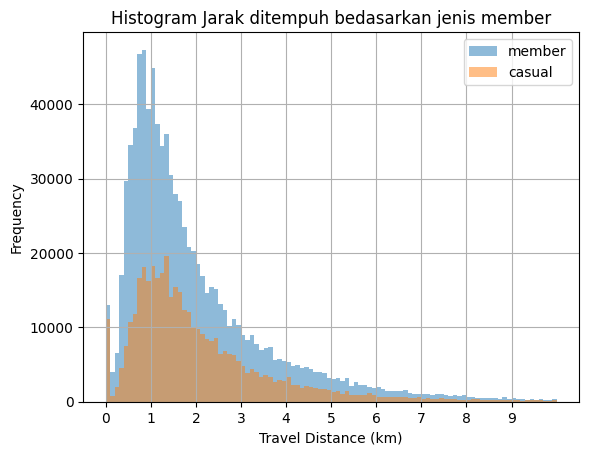

In [23]:
bin_edges = np.arange(0, 10, 1)

# Plot histogram for member type 'member' with custom bin edges
plt.hist(df_q3.loc[(df_q3['member_casual'] == 'member')&(df_q3['distance_km']<10)&(df_q3['distance_km']>0),'distance_km'], bins=100, alpha=0.5, label='member')

# Plot histogram for member type 'casual' with custom bin edges
plt.hist(df_q3.loc[(df_q3['member_casual'] == 'casual')&(df_q3['distance_km']<10)&(df_q3['distance_km']>0),'distance_km'], bins=100, alpha=0.5, label='casual')

# Add labels and title
plt.xlabel('Travel Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram Jarak ditempuh bedasarkan jenis member')
plt.legend()

# Set custom x-axis ticks
plt.xticks(bin_edges)

# Show plot
plt.grid(True)
plt.show()

### Distribusi Jarak yang ditempuh member dan casual pada setiap bulan pada q3

Distribusi Jarak yang ditempuh member dan casual pada setiap bulan September

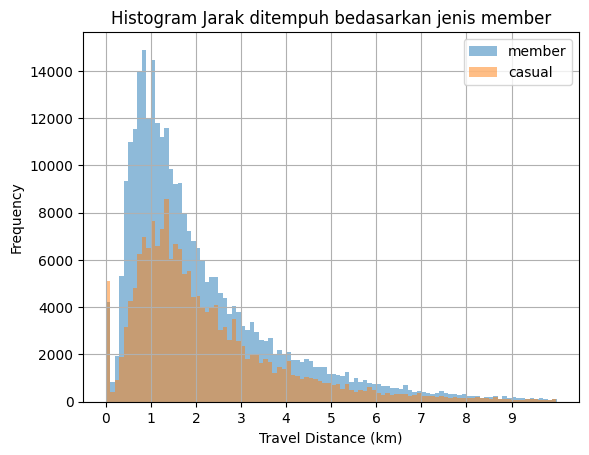

In [24]:
bin_edges = np.arange(0, 10, 1)
temp =df_q3.loc[df_q3['started_at'].dt.month == 9]
# Plot histogram for member type 'member' with custom bin edges
plt.hist(temp.loc[(temp['member_casual'] == 'member')&(temp['distance_km']<10)&(temp['distance_km']>0),'distance_km'], bins=100, alpha=0.5, label='member')

# Plot histogram for member type 'casual' with custom bin edges
plt.hist(temp.loc[(temp['member_casual'] == 'casual')&(temp['distance_km']<10)&(temp['distance_km']>0),'distance_km'], bins=100, alpha=0.5, label='casual')

# Add labels and title
plt.xlabel('Travel Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram Jarak ditempuh bedasarkan jenis member')
plt.legend()

# Set custom x-axis ticks
plt.xticks(bin_edges)

# Show plot
plt.grid(True)
plt.show()

Distribusi Jarak yang ditempuh member dan casual pada setiap bulan Oktober

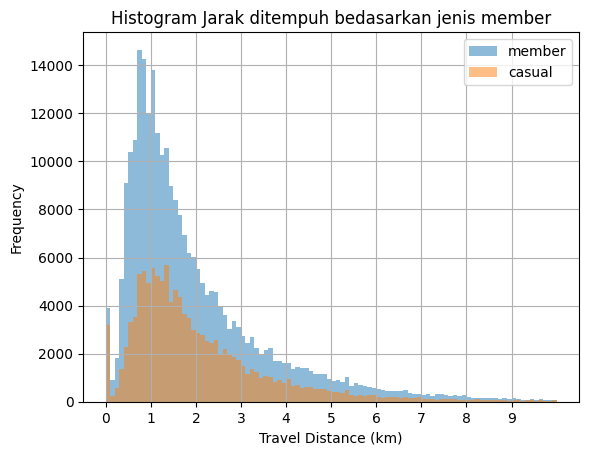

In [25]:
bin_edges = np.arange(0, 10, 1)
temp =df_q3.loc[df_q3['started_at'].dt.month == 10]
# Plot histogram for member type 'member' with custom bin edges
plt.hist(temp.loc[(temp['member_casual'] == 'member')&(temp['distance_km']<10)&(temp['distance_km']>0),'distance_km'], bins=100, alpha=0.5, label='member')

# Plot histogram for member type 'casual' with custom bin edges
plt.hist(temp.loc[(temp['member_casual'] == 'casual')&(temp['distance_km']<10)&(temp['distance_km']>0),'distance_km'], bins=100, alpha=0.5, label='casual')

# Add labels and title
plt.xlabel('Travel Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram Jarak ditempuh bedasarkan jenis member')
plt.legend()

# Set custom x-axis ticks
plt.xticks(bin_edges)

# Show plot
plt.grid(True)
plt.show()

Distribusi Jarak yang ditempuh member dan casual pada setiap bulan November

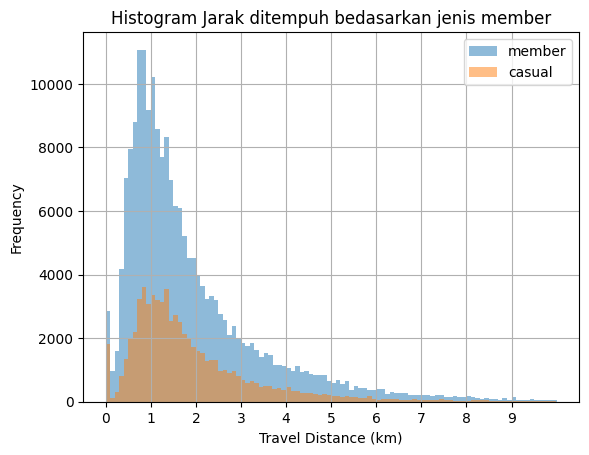

In [26]:
bin_edges = np.arange(0, 10, 1)
temp =df_q3.loc[df_q3['started_at'].dt.month == 11]
# Plot histogram for member type 'member' with custom bin edges
plt.hist(temp.loc[(temp['member_casual'] == 'member')&(temp['distance_km']<10)&(temp['distance_km']>0),'distance_km'], bins=100, alpha=0.5, label='member')

# Plot histogram for member type 'casual' with custom bin edges
plt.hist(temp.loc[(temp['member_casual'] == 'casual')&(temp['distance_km']<10)&(temp['distance_km']>0),'distance_km'], bins=100, alpha=0.5, label='casual')

# Add labels and title
plt.xlabel('Travel Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram Jarak ditempuh bedasarkan jenis member')
plt.legend()

# Set custom x-axis ticks
plt.xticks(bin_edges)

# Show plot
plt.grid(True)
plt.show()

Distribusi Jarak yang ditempuh member dan casual pada setiap bulan Desember

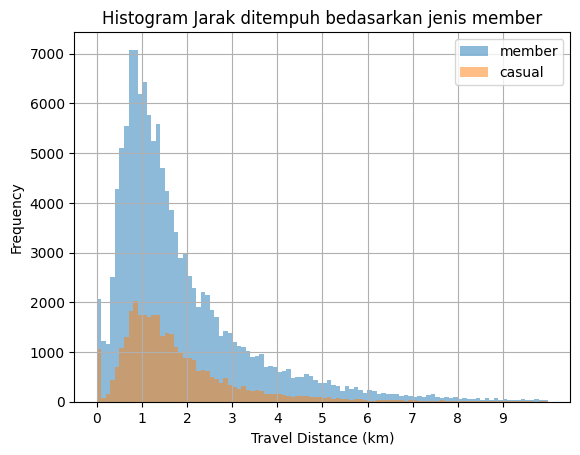

In [27]:
bin_edges = np.arange(0, 10, 1)
temp =df_q3.loc[df_q3['started_at'].dt.month == 12]
# Plot histogram for member type 'member' with custom bin edges
plt.hist(temp.loc[(temp['member_casual'] == 'member')&(temp['distance_km']<10)&(temp['distance_km']>0),'distance_km'], bins=100, alpha=0.5, label='member')

# Plot histogram for member type 'casual' with custom bin edges
plt.hist(temp.loc[(temp['member_casual'] == 'casual')&(temp['distance_km']<10)&(temp['distance_km']>0),'distance_km'], bins=100, alpha=0.5, label='casual')

# Add labels and title
plt.xlabel('Travel Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram Jarak ditempuh bedasarkan jenis member')
plt.legend()

# Set custom x-axis ticks
plt.xticks(bin_edges)

# Show plot
plt.grid(True)
plt.show()

### Distribusi Jarak yang ditempuh semua pengguna pada setiap interval pada q3

In [28]:
df_q3.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_km,ride_duration,time_interval,start_day,end_day,month,week
0,011C1903BF4E2E28,classic_bike,2023-09-23 00:27:50,2023-09-23 00:33:27,Halsted St & Wrightwood Ave,TA1309000061,Sheffield Ave & Wellington Ave,TA1307000052,41.929143,-87.649077,41.936253,-87.652662,member,0.844439,5.62,00.00-03.00,Saturday,Saturday,9,4


In [29]:
temp_interval = df_q3['time_interval'].sort_values().unique()
temp_interval

array(['00.00-03.00', '03.00-06.00', '06.00-09.00', '09.00-12.00',
       '12.00-15.00', '15.00-18.00', '18.00-21.00', '21.00-24.00'],
      dtype=object)

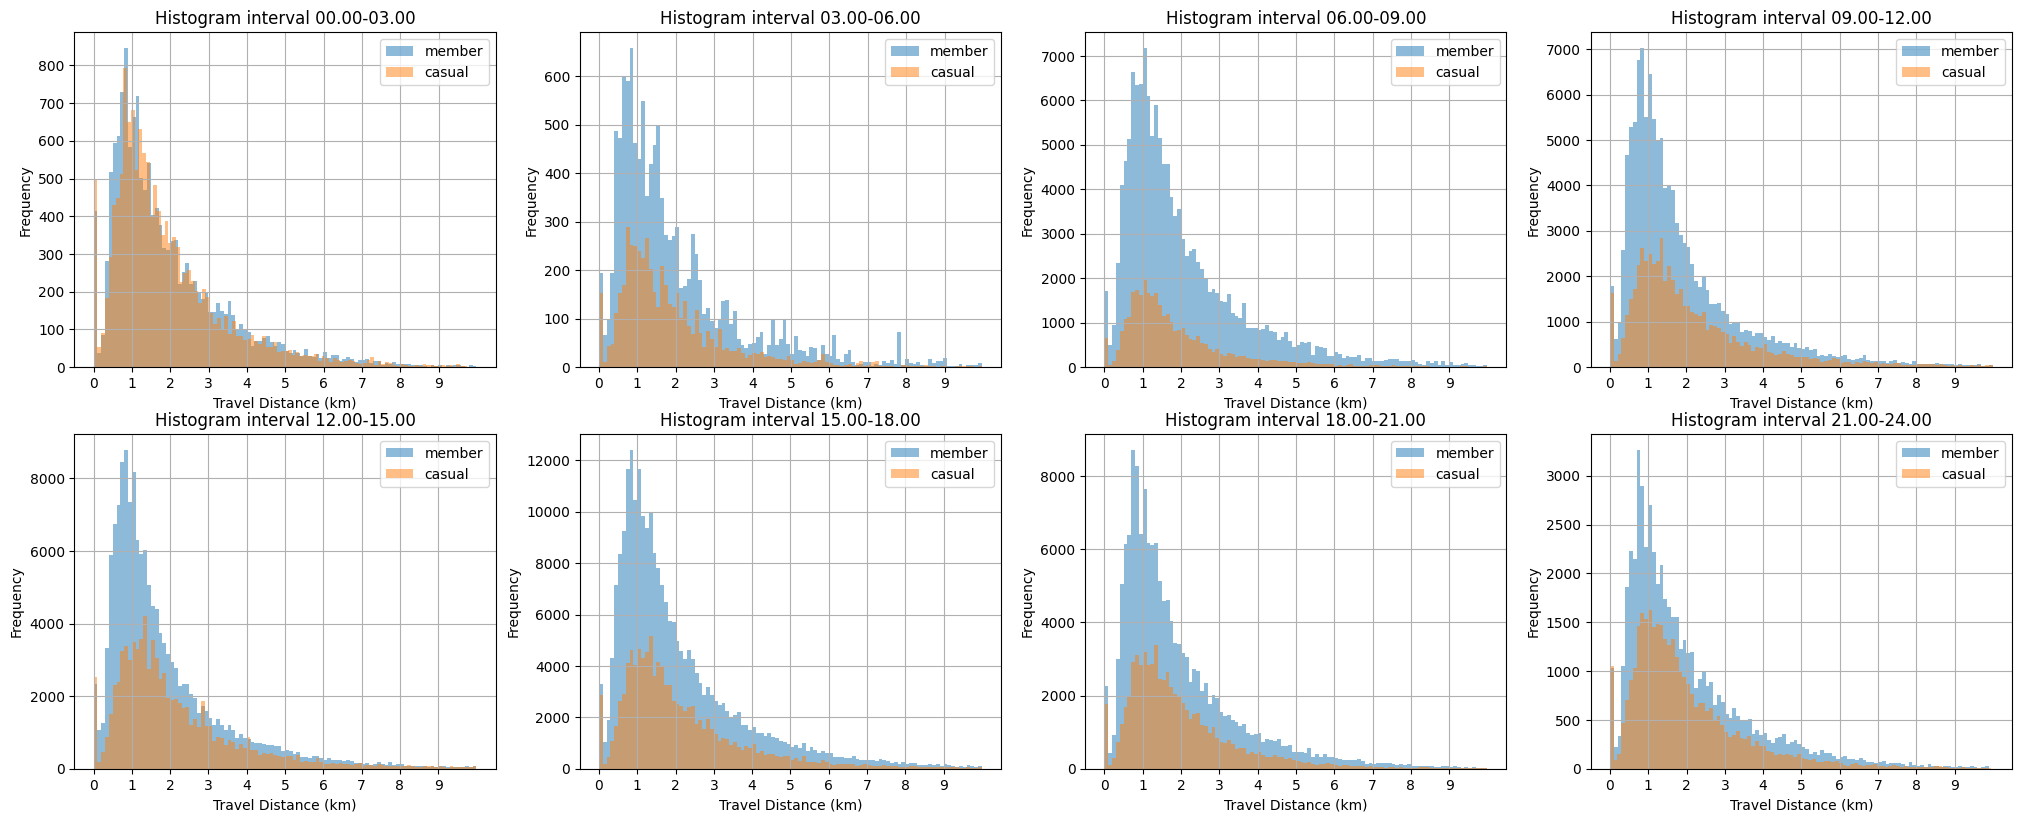

In [30]:
bin_edges = np.arange(0, 10, 1)
plt.figure(figsize=(25,20))
# Plot histogram for member type 'member' with custom bin edges
count = 1

for interval in temp_interval:
  plt.subplot(4,4,count)
  plt.hist(df_q3.loc[(df_q3['member_casual'] == 'member')&(df_q3['time_interval'] == interval)&(df_q3['distance_km']<10)&(df_q3['distance_km']>0),'distance_km'],bins=100, alpha=0.5, label='member')
  plt.hist(df_q3.loc[(df_q3['member_casual'] == 'casual')&(df_q3['time_interval'] == interval)&(df_q3['distance_km']<10)&(df_q3['distance_km']>0),'distance_km'],bins=100, alpha=0.5, label='casual')
  plt.title(f'Histogram interval {interval}')
  plt.xlabel('Travel Distance (km)')
  plt.ylabel('Frequency')
  plt.legend()
  plt.xticks(bin_edges)
  plt.grid(True)
  count+=1

# Add labels and title


# Set custom x-axis ticks


# Show plot

plt.show()

In [31]:
average_distance_per_member_type = df_q3.groupby(['month', 'member_casual'])['distance_km'].mean()
average_distance_per_member_type

month  member_casual
9      casual           2.143801
       member           2.091847
10     casual           2.032330
       member           1.967892
11     casual           1.872637
       member           1.896785
12     casual           1.720230
       member           1.833167
Name: distance_km, dtype: float64

In [32]:
september_member_rides = df_q3[(df_q3['member_casual'] == 'member') & (df_q3['started_at'].dt.month == 9)]
september_average_distance = september_member_rides['distance_km'].mean()

october_member_rides = df_q3[(df_q3['member_casual'] == 'member') & (df_q3['started_at'].dt.month == 10)]
october_average_distance = october_member_rides['distance_km'].mean()

november_member_rides = df_q3[(df_q3['member_casual'] == 'member') & (df_q3['started_at'].dt.month == 11)]
november_average_distance = november_member_rides['distance_km'].mean()

december_member_rides = df_q3[(df_q3['member_casual'] == 'member') & (df_q3['started_at'].dt.month == 12)]
december_average_distance = december_member_rides['distance_km'].mean()

print("Average distance traveled by members in September:", september_average_distance, "km")
print("Average distance traveled by members in October:", october_average_distance, "km")
print("Average distance traveled by members in November:", november_average_distance, "km")
print("Average distance traveled by members in December:", december_average_distance, "km")

Average distance traveled by members in September: 2.0918474555371978 km
Average distance traveled by members in October: 1.9678921750294263 km
Average distance traveled by members in November: 1.8967854961577395 km
Average distance traveled by members in December: 1.8331668955461098 km


## Analisa Distribusi Casual dan Member Berdasarkan Bulan, Minggu dan Hari

### Distribusi Casual dan Member

C:\Users\firda\AppData\Local\Temp\ipykernel_7316\2060980374.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(pie[0], labels=['Member', 'Casual'], loc='upper right')


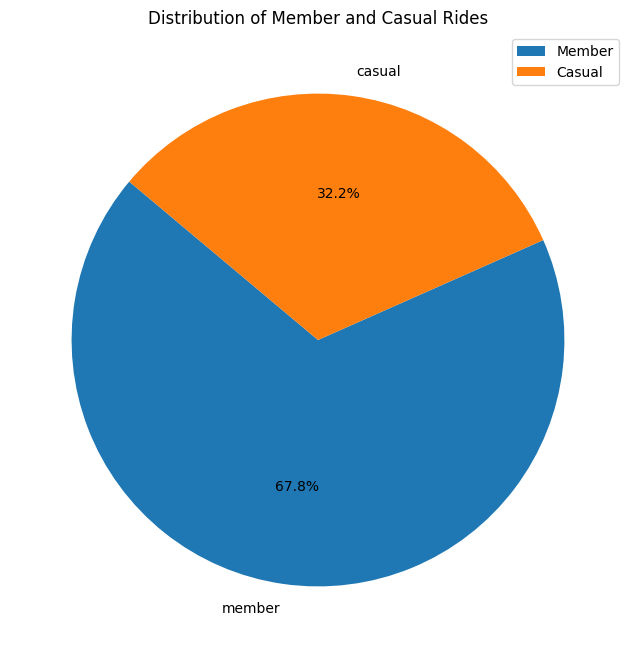

In [33]:
ride_counts = df_q3['member_casual'].value_counts()


plt.figure(figsize=(8, 8))
pie = plt.pie(ride_counts, labels=ride_counts.index, autopct='%1.1f%%', startangle=140)
plt.legend(pie[0], labels=['Member', 'Casual'], loc='upper right')
plt.title('Distribution of Member and Casual Rides')
plt.show()

### Distribusi Casual dan Member Berdasarkan Bulan

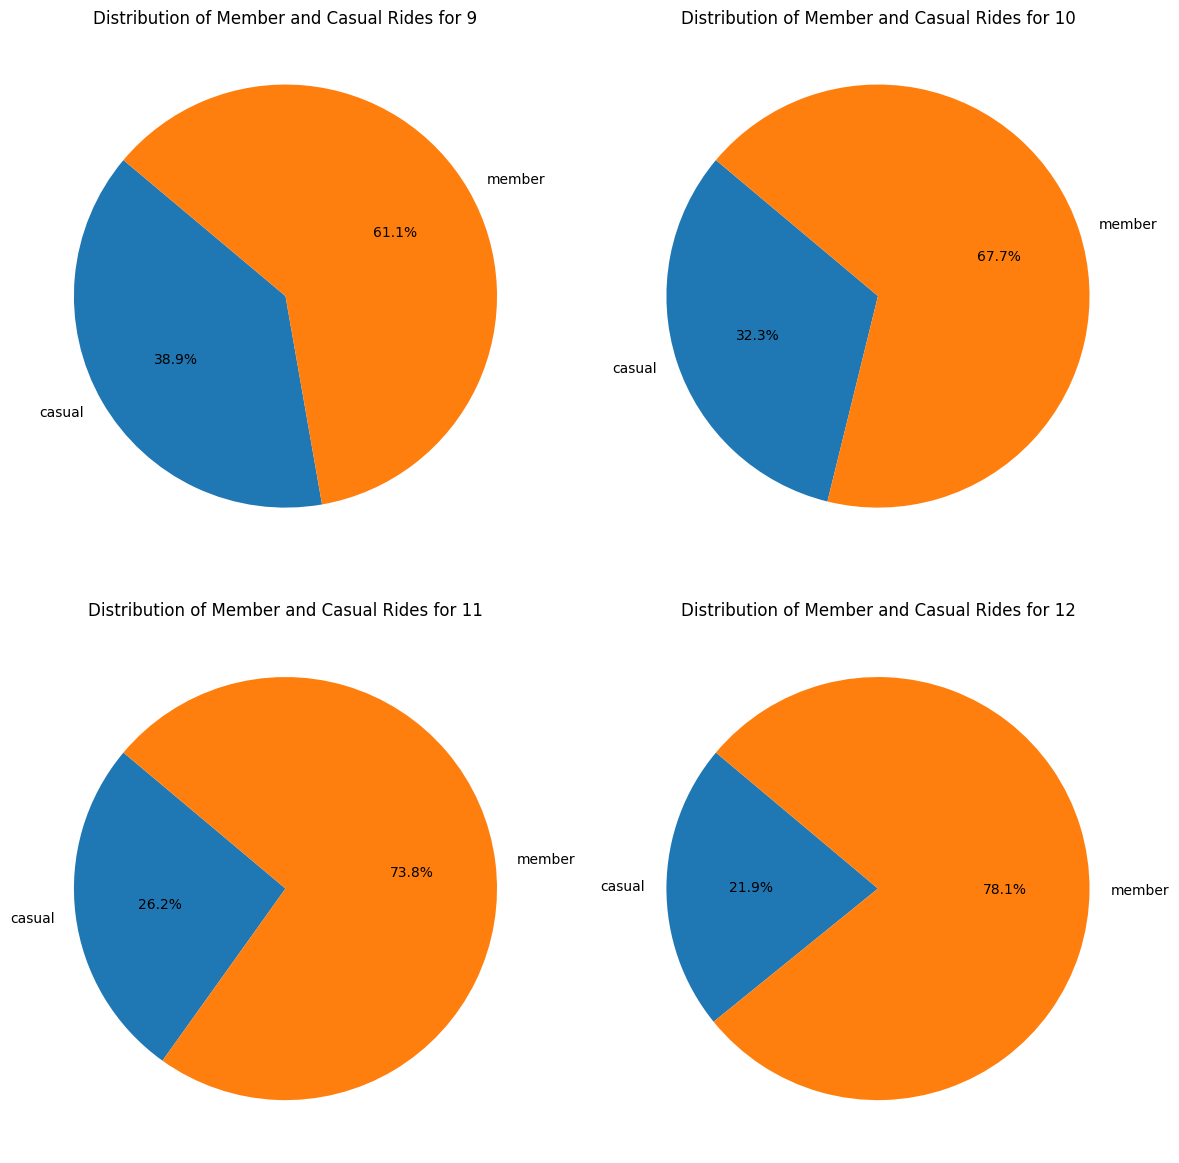

In [34]:
ride_counts_month_member = df_q3.groupby(['month', 'member_casual']).size().unstack(fill_value=0)
total_rides_per_month = ride_counts_month_member.sum(axis=1)
ride_percentage_month_member = ride_counts_month_member.div(total_rides_per_month, axis=0) * 100

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

for i, (month, data) in enumerate(ride_percentage_month_member.iterrows()):
    ax = axes[i // 2, i % 2]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Distribution of Member and Casual Rides for {month}')

plt.tight_layout()
plt.show()

### Distribusi Casual dan Member Berdasarkan Minggu

In [35]:
def classify_day(day):
    if day == 'Sunday':
        return 'Weekend'
    elif day == 'Monday':
        return 'Weekday'
    elif day == 'Tuesday':
        return 'Weekday'
    elif day == 'Wednesday':
        return 'Weekday'
    elif day == 'Thursday':
        return 'Weekday'
    elif day == 'Friday':
        return 'Weekday'
    elif day == 'Saturday':
        return 'Weekend'
    else:
        return 'Weekend'
df_q3['Weekday/Weekday']  = df_q3['start_day'].apply(classify_day)

C:\Users\firda\AppData\Local\Temp\ipykernel_7316\4222444908.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['Weekday/Weekday']  = df_q3['start_day'].apply(classify_day)


In [36]:
this= df_q3.loc[(df_q3['distance_km']==0)&(df_q3['ride_duration']<1)&(df_q3['ride_duration']>-1)].index
df_q3.drop(this,inplace=True)
df_q3.loc[(df_q3['distance_km']==0)&(df_q3['ride_duration']<1)&(df_q3['ride_duration']>-1)]

C:\Users\firda\AppData\Local\Temp\ipykernel_7316\2016320607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3.drop(this,inplace=True)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,distance_km,ride_duration,time_interval,start_day,end_day,month,week,Weekday/Weekday


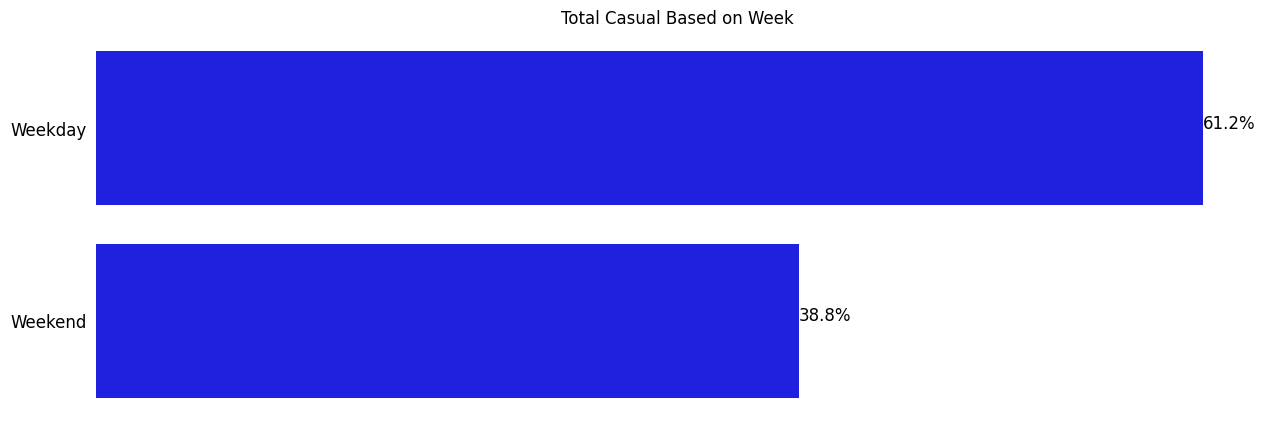

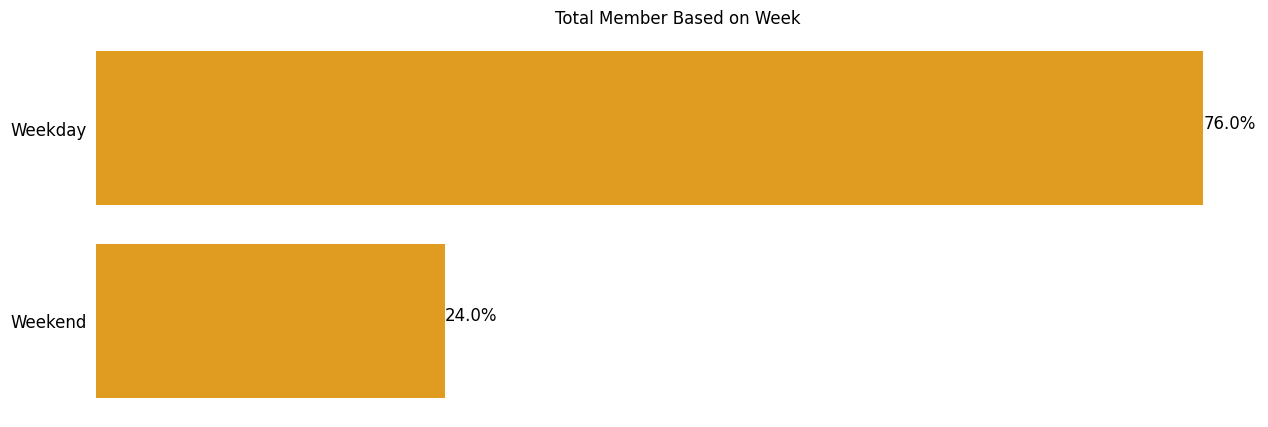

In [64]:
df_weekly_casual_week = df_q3.loc[df_q3['member_casual'] == 'casual'].groupby('Weekday/Weekday')[['member_casual']].count().sort_values(by='member_casual', ascending=False)
df_weekly_member_week = df_q3.loc[df_q3['member_casual'] == 'member'].groupby('Weekday/Weekday')[['member_casual']].count().sort_values(by='member_casual', ascending=False)
total_casual =df_q3.loc[df_q3['member_casual'] == 'casual'].groupby('Weekday/Weekday')[['member_casual']].count().sum().iloc[0]
total_member =df_q3.loc[df_q3['member_casual'] == 'member'].groupby('Weekday/Weekday')[['member_casual']].count().sum().iloc[0]
plt.figure(figsize=(15,5))
ax = sns.barplot(df_weekly_casual_week, x='member_casual', y='Weekday/Weekday', color='blue')
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total_casual)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage,(x,y), fontsize=12)
plt.title("Total Casual Based on Week")
plt.xlabel("Total Casual")
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
ax.set(ylabel=None)


plt.figure(figsize=(15,5))
ax = sns.barplot(df_weekly_member_week, x='member_casual', y='Weekday/Weekday', color='orange')
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total_member)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage,(x,y), fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(fontsize=12)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.title("Total Member Based on Week")
plt.show()

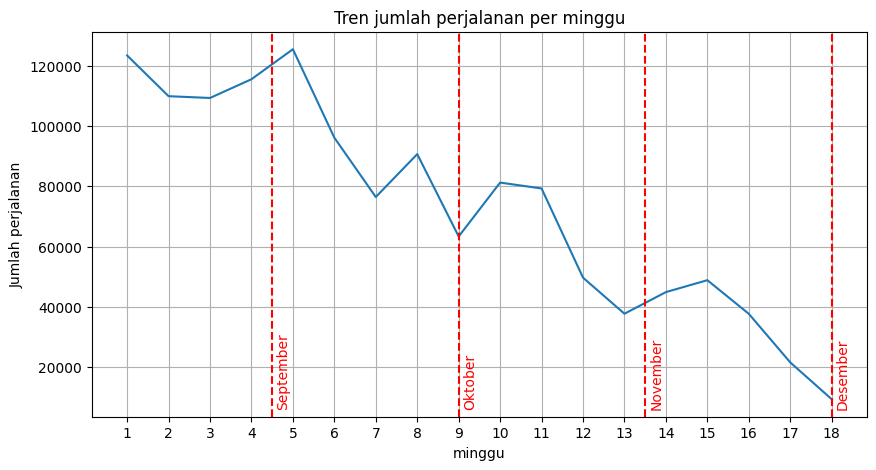

In [38]:
weekly_tren_q3= df_q3.groupby('week')['ride_id'].count()
plt.figure(figsize=(10,5))
plt.plot(weekly_tren_q3)

plt.xlabel('minggu')
plt.ylabel('Jumlah perjalanan')
plt.title('Tren jumlah perjalanan per minggu')
ax= plt.xticks(ticks=weekly_tren_q3.index)

plt.axvline(4.5,color='red',linestyle='--')
plt.text(4.6, 7000, 'September',rotation=90,color='red')
plt.axvline(9,color='red',linestyle='--')
plt.text(9.1, 7000, 'Oktober',rotation=90,color='red')
plt.axvline(13.5,color='red',linestyle='--')
plt.text(13.6, 7000, 'November',rotation=90,color='red')
plt.axvline(18,color='red',linestyle='--')
plt.text(18.1, 7000, 'Desember',rotation=90,color='red')
plt.grid()
plt.show()

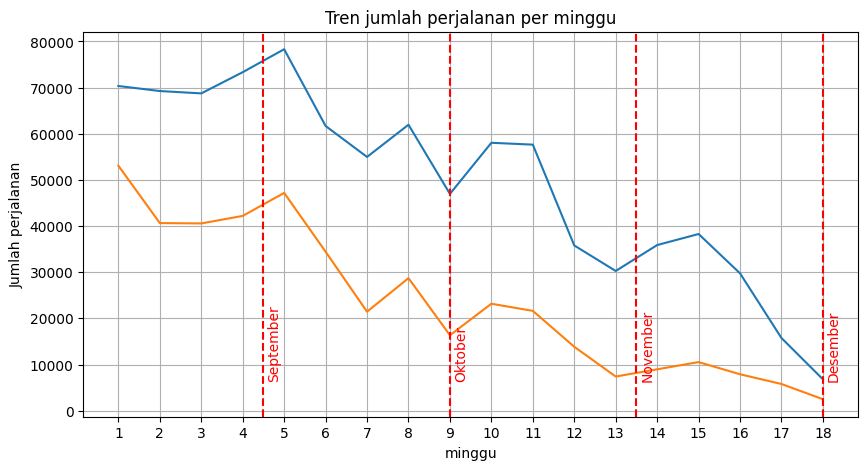

In [39]:
weekly_tren_q3_member= df_q3.loc[(df_q3['member_casual'] == 'member')].groupby('week')['ride_id'].count()
weekly_tren_q3_casual= df_q3.loc[(df_q3['member_casual'] == 'casual')].groupby('week')['ride_id'].count()
plt.figure(figsize=(10,5))
plt.plot(weekly_tren_q3_member,label='member')
plt.plot(weekly_tren_q3_casual,label='member')

plt.xlabel('minggu')
plt.ylabel('Jumlah perjalanan')
plt.title('Tren jumlah perjalanan per minggu')
plt.xticks(ticks=weekly_tren_q3_member.index)
plt.axvline(4.5,color='red',linestyle='--')
plt.text(4.6, 7000, 'September',rotation=90,color='red')
plt.axvline(9,color='red',linestyle='--')
plt.text(9.1, 7000, 'Oktober',rotation=90,color='red')
plt.axvline(13.5,color='red',linestyle='--')
plt.text(13.6, 7000, 'November',rotation=90,color='red')
plt.axvline(18,color='red',linestyle='--')
plt.text(18.1, 7000, 'Desember',rotation=90,color='red')
plt.grid()
plt.show()

### Distribusi Casual dan Member Berdasarkan Hari

In [40]:
df_q3.loc[df_q3['member_casual'] == 'casual'].groupby('start_day')[['member_casual']].count().sum().iloc[0]

426386

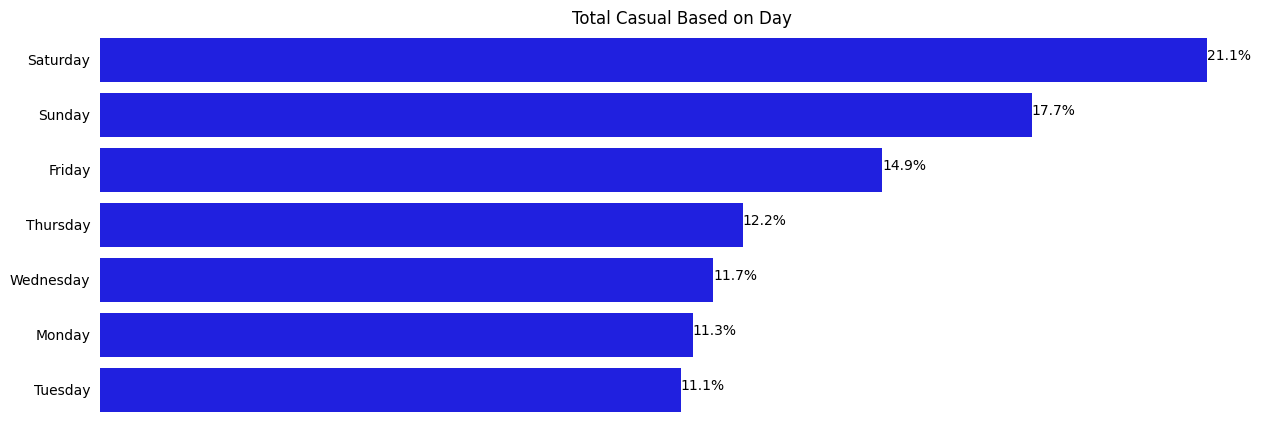

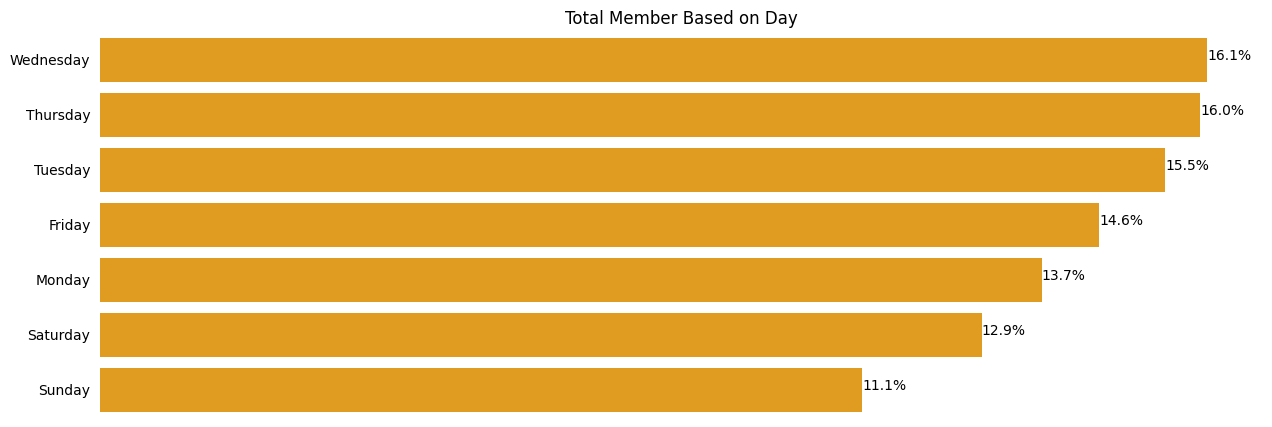

In [41]:
df_weekly_casual_start = df_q3.loc[df_q3['member_casual'] == 'casual'].groupby('start_day')[['member_casual']].count().sort_values(by='member_casual', ascending=False)
df_weekly_member_start = df_q3.loc[df_q3['member_casual'] == 'member'].groupby('start_day')[['member_casual']].count().sort_values(by='member_casual', ascending=False)
total_casual_day =df_q3.loc[df_q3['member_casual'] == 'casual'].groupby('start_day')[['member_casual']].count().sum().iloc[0]
total_member_day =df_q3.loc[df_q3['member_casual'] == 'member'].groupby('start_day')[['member_casual']].count().sum().iloc[0]
plt.figure(figsize=(15,5))
ax = sns.barplot(df_weekly_casual_start, x='member_casual', y='start_day', color='blue')
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total_casual_day)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage,(x,y))
plt.title("Total Casual Based on Day")
plt.xlabel("Total Casual")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
ax.set(ylabel=None)

plt.figure(figsize=(15,5))
ax = sns.barplot(df_weekly_member_start, x='member_casual', y='start_day', color='orange')
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total_member_day)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage,(x,y))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Total Member Based on Day")
plt.xlabel("Total Member")
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()


## Analisa Distribusi Casual dan Member Berdasarkan Stasiun

### Top 10 stasiun awal bedasarkan jumlah pengguna




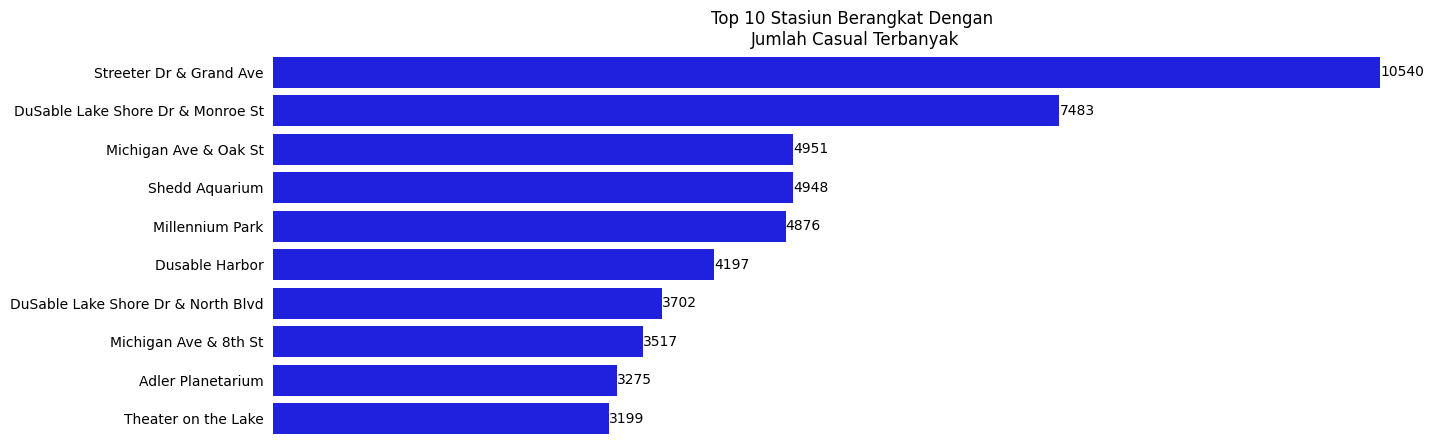

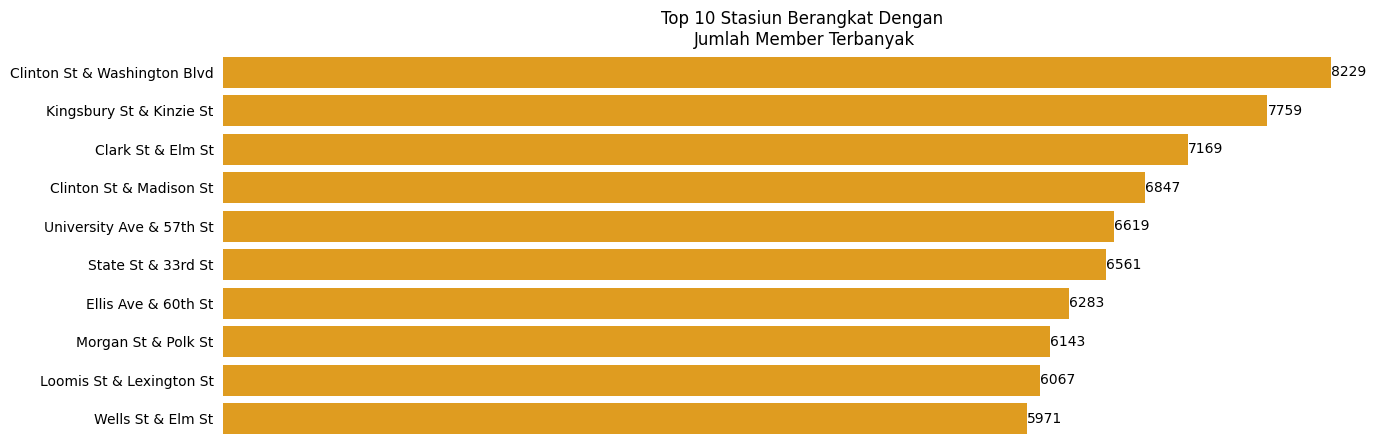

In [42]:
df_q3_topstartcasual = df_q3.loc[df_q3['member_casual'] == 'casual'].groupby('start_station_name')[['member_casual']].count().sort_values(by='member_casual', ascending=False).head(10).reset_index()
df_q3_topstartmember = df_q3.loc[df_q3['member_casual'] == 'member'].groupby('start_station_name')[['member_casual']].count().sort_values(by='member_casual', ascending=False).head(10).reset_index()
plt.figure(figsize=(15,5))
ax = sns.barplot(df_q3_topstartcasual, x='member_casual', y='start_station_name', color='blue')
ax.bar_label(ax.containers[0])
plt.title("Top 10 Stasiun Berangkat Dengan \nJumlah Casual Terbanyak")
plt.xlabel("Total Casual")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
ax.set(ylabel=None)

plt.figure(figsize=(15,5))
ax = sns.barplot(df_q3_topstartmember, x='member_casual', y='start_station_name', color='orange')
ax.bar_label(ax.containers[0])
plt.title("Top 10 Stasiun Berangkat Dengan \nJumlah Member Terbanyak")
plt.xlabel("Total Member")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

## Analisis bedasarkan durasi perjalanan pengguna

In [43]:
# Calculate the duration of each ride
df_q3['duration_minutes'] = (df_q3['ended_at'] - df_q3['started_at']).dt.total_seconds() / 60

# Filter DataFrame for member rides
member_rides = df_q3[df_q3['member_casual'] == 'member']

# Calculate the average travel duration for members
average_duration_member = member_rides['duration_minutes'].mean()

# Print the result
print("Average travel duration for members:", average_duration_member, "minutes")

C:\Users\firda\AppData\Local\Temp\ipykernel_7316\2246028947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['duration_minutes'] = (df_q3['ended_at'] - df_q3['started_at']).dt.total_seconds() / 60


Average travel duration for members: 11.84696149325506 minutes


## Analisis bedasarkan Interval Jam Pengguna Berangkat

In [44]:
# Apply the function to create a new column 'time_interval'
df_q3['time_interval'] = df_q3['started_at'].apply(classify_time_interval)

# Group by time interval and count members
members_per_interval = df_q3[df_q3['member_casual'] == 'member'].groupby('time_interval').size()

# Find the time interval with the most members
most_members_interval = members_per_interval.idxmax()

# Print the result
print("Time interval with the most members:", most_members_interval)

C:\Users\firda\AppData\Local\Temp\ipykernel_7316\2334524434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['time_interval'] = df_q3['started_at'].apply(classify_time_interval)


Time interval with the most members: 15.00-18.00


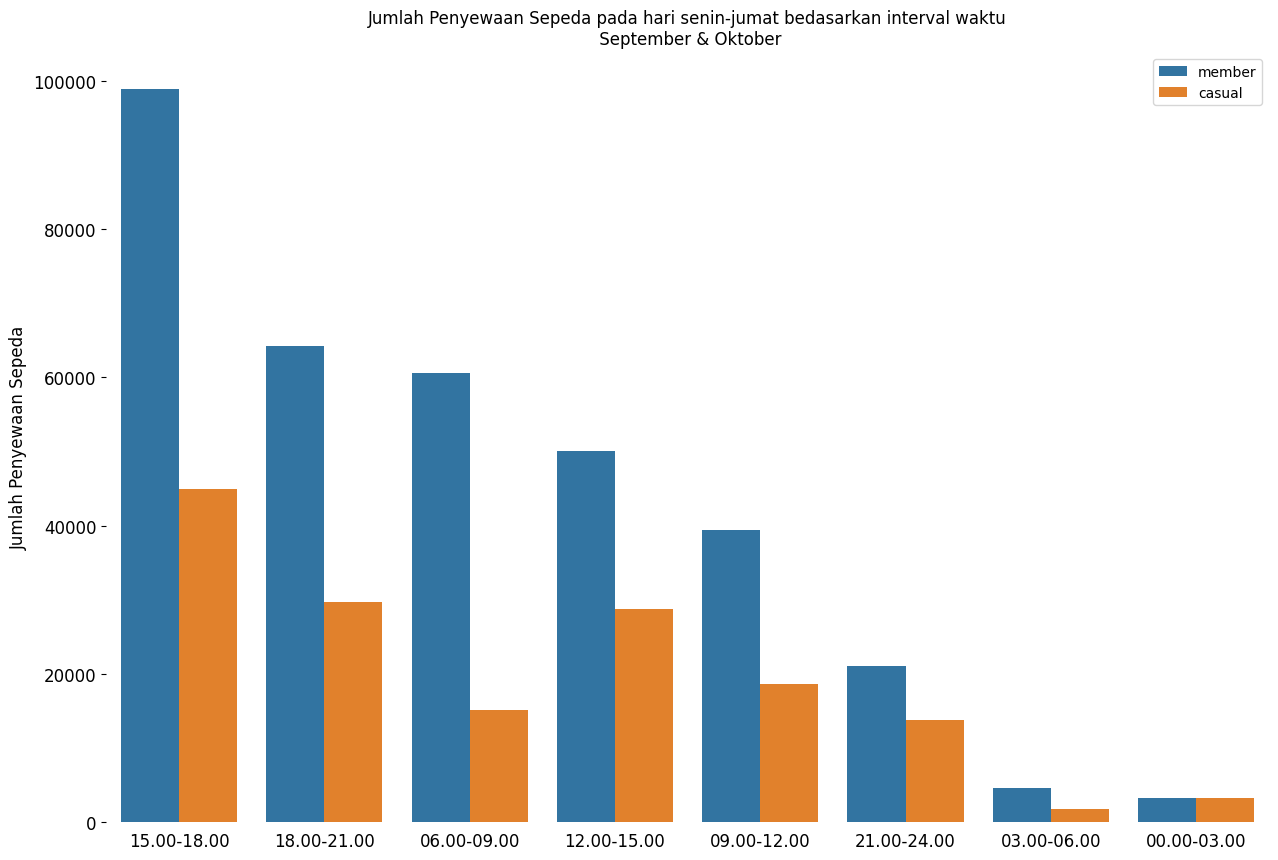

In [70]:
df_sep_okt=df_q3.loc[df_q3['month'].isin([9,10])]
df_interval_bar=df_sep_okt.loc[(df_sep_okt['start_day'].isin(['Monday','Tuesday','Wednesday','Thurdsay','Friday']))].groupby(['time_interval','member_casual'])['ride_id'].count().to_frame().sort_values(by=['ride_id'],ascending=False)
plt.figure(figsize=(15,10))
ax = sns.barplot(data=df_interval_bar,x='time_interval',y='ride_id',hue='member_casual')
plt.title(f'Jumlah Penyewaan Sepeda pada hari senin-jumat bedasarkan interval waktu\n September & Oktober')
plt.xlabel('Interval jam')
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.legend()
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.set(xticklabels=[])
ax.tick_params(bottom=False)
# ax.tick_params(left=False)
ax.set(xlabel=None)
# ax.set(ylabel=None)

plt.show()

In [46]:
# df_sep_okt=df_q3.loc[df_q3['month'].isin([9,10])]
# total_casual_day_month =df_sep_okt.loc[(df_sep_okt['start_day'].isin(['Monday','Tuesday','Wednesday','Thurdsay','Friday']))]
# total_casual_day_month.loc[df_sep_okt['member_casual'] == 'casual']
df_q3.loc[df_q3['member_casual'] == 'casual'].groupby('start_day')[['member_casual']].count().sum().iloc[0]
# .count().sum().iloc[0]
# total_casual_day_month

426386

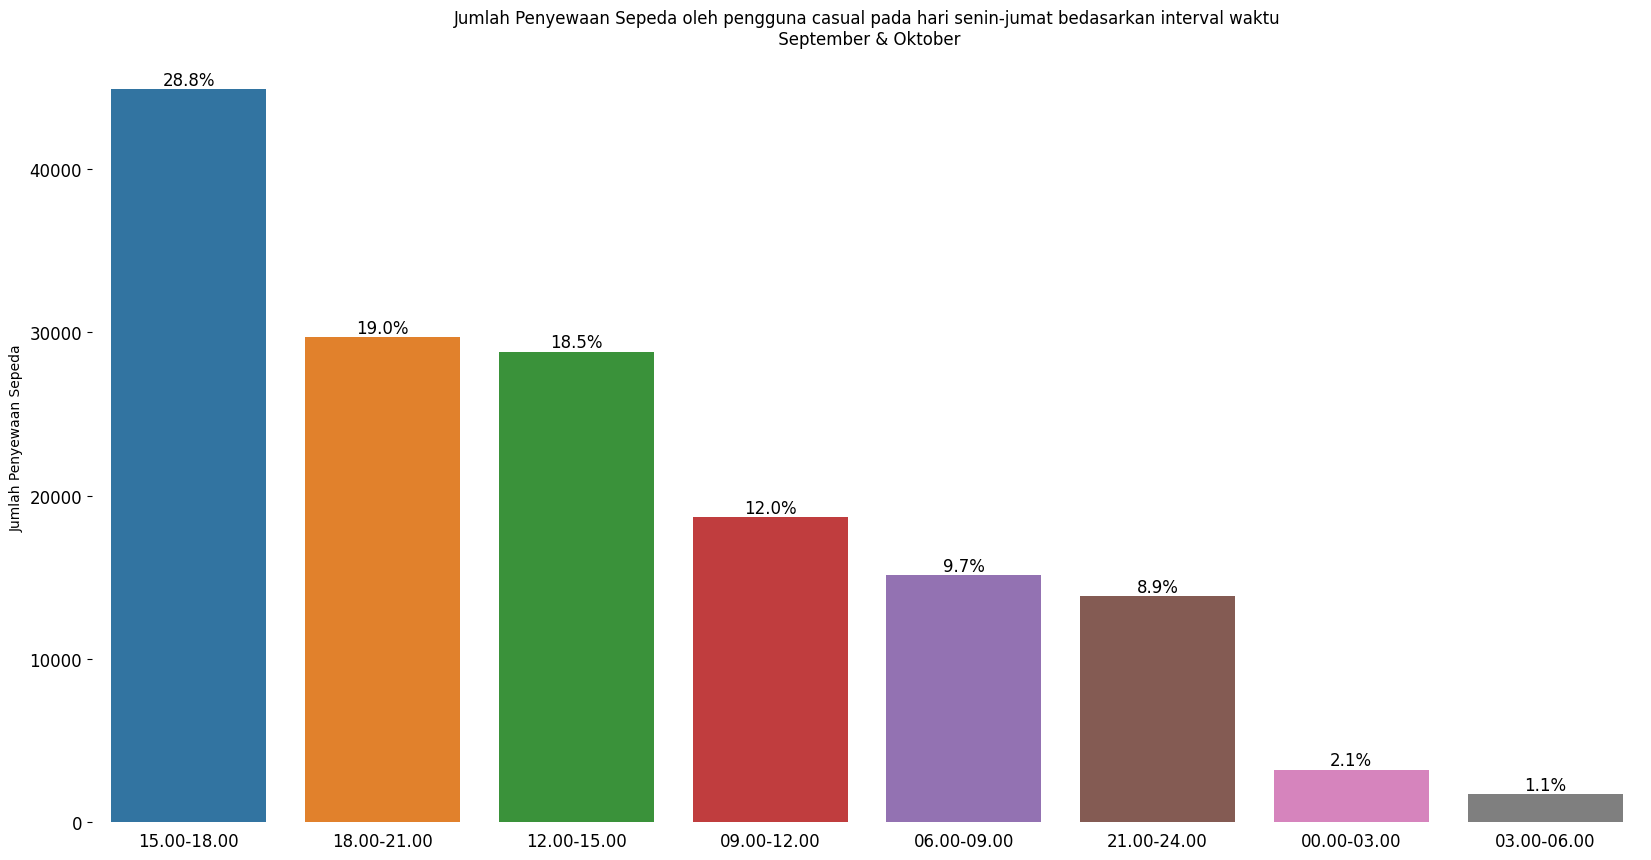

In [47]:
df_sep_okt=df_q3.loc[df_q3['month'].isin([9,10])]
week_day=df_sep_okt.loc[(df_sep_okt['start_day'].isin(['Monday','Tuesday','Wednesday','Thurdsay','Friday']))]
df_interval_bar_c=week_day.loc[week_day['member_casual']=='casual'].groupby(['time_interval'])['ride_id'].count().to_frame().sort_values(by=['ride_id'],ascending=False)
total_sep_okt = week_day.loc[week_day['member_casual']=='casual'].groupby(['time_interval'])['ride_id'].count().sum()
total_sep_okt

plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_interval_bar_c,x='time_interval',y='ride_id',hue='time_interval')
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_sep_okt)
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height()+ 0.02
        ax.annotate(percentage,(x,y), ha = 'center', va='bottom', fontsize=12)
plt.title(f'Jumlah Penyewaan Sepeda oleh pengguna casual pada hari senin-jumat bedasarkan interval waktu\n September & Oktober')
plt.xlabel('Interval jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.set(xticklabels=[])
ax.tick_params(bottom=False)
# ax.tick_params(left=False)
ax.set(xlabel=None)
# ax.set(ylabel=None)

plt.show()

C:\Users\firda\AppData\Local\Temp\ipykernel_7316\3065458126.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


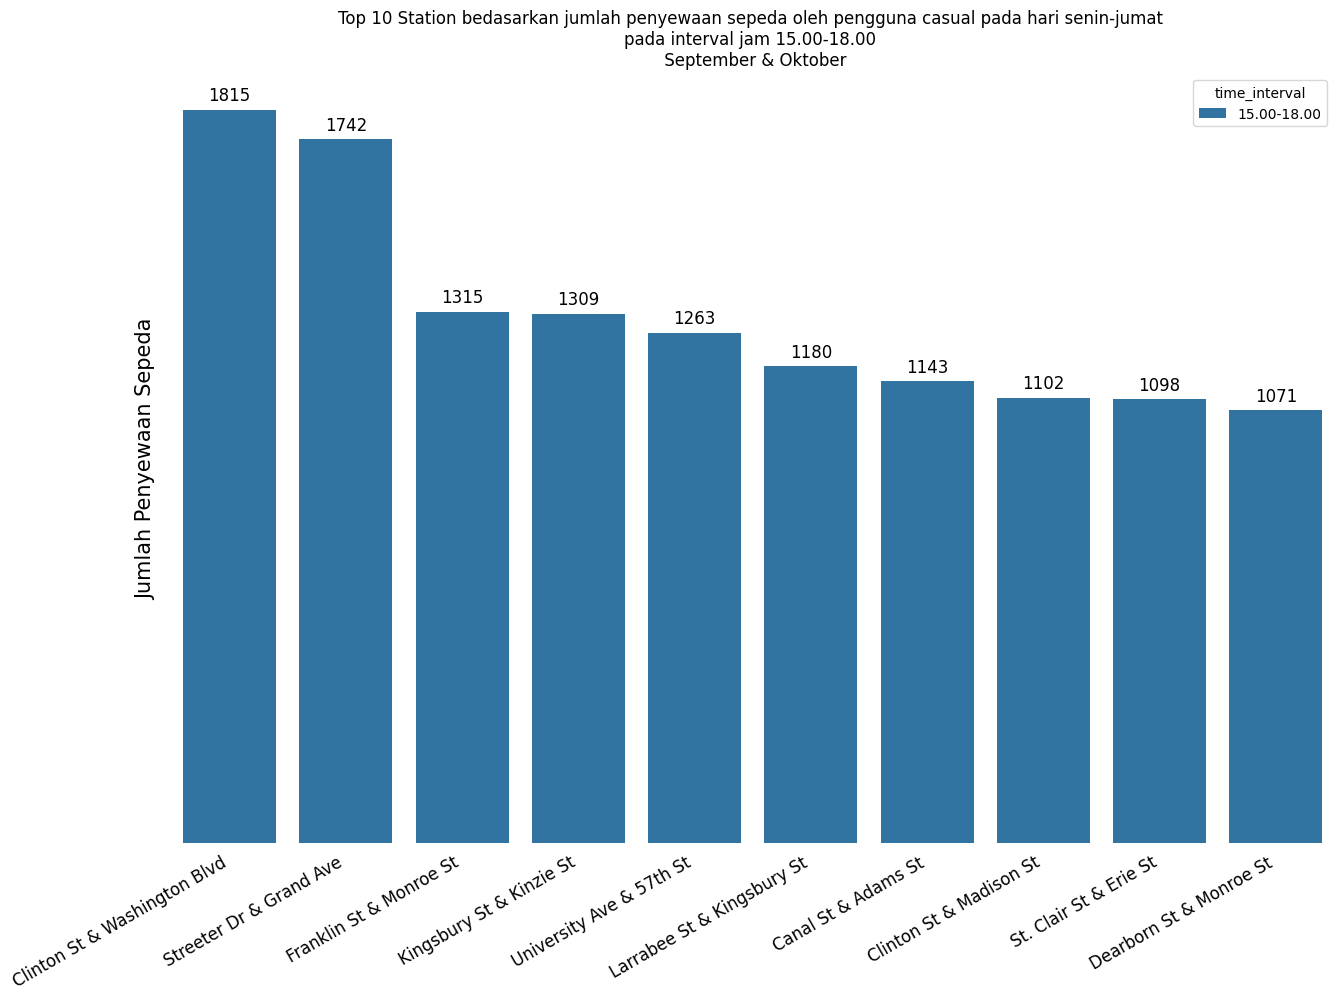

In [48]:
df_sep_okt=df_q3.loc[df_q3['month'].isin([9,10])]
week_day=df_sep_okt.loc[(df_sep_okt['start_day'].isin(['Monday','Tuesday','Wednesday','Thurdsay','Friday']))]
stations_ti=week_day.loc[(week_day['time_interval']=='15.00-18.00')]
top10_station = stations_ti.groupby(['start_station_id'])['ride_id'].count().sort_values(ascending=False).head(10).index
station_ti= stations_ti.loc[(stations_ti['start_station_id'].isin(top10_station))]
top5_station_ti=station_ti.groupby(['start_station_name','time_interval'])['ride_id'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,10))
ax= sns.barplot(data=top5_station_ti,x='start_station_name',y='ride_id',hue='time_interval')
plt.title(f'Top 10 Station bedasarkan jumlah penyewaan sepeda oleh pengguna casual pada hari senin-jumat \npada interval jam 15.00-18.00 \n September & Oktober')
plt.xlabel('nama station')
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(yticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
# ax.set(ylabel=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h!=0:
        ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), fontsize=12, textcoords="offset points", ha="center", va="bottom")

plt.show()

C:\Users\firda\AppData\Local\Temp\ipykernel_7316\2361711240.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


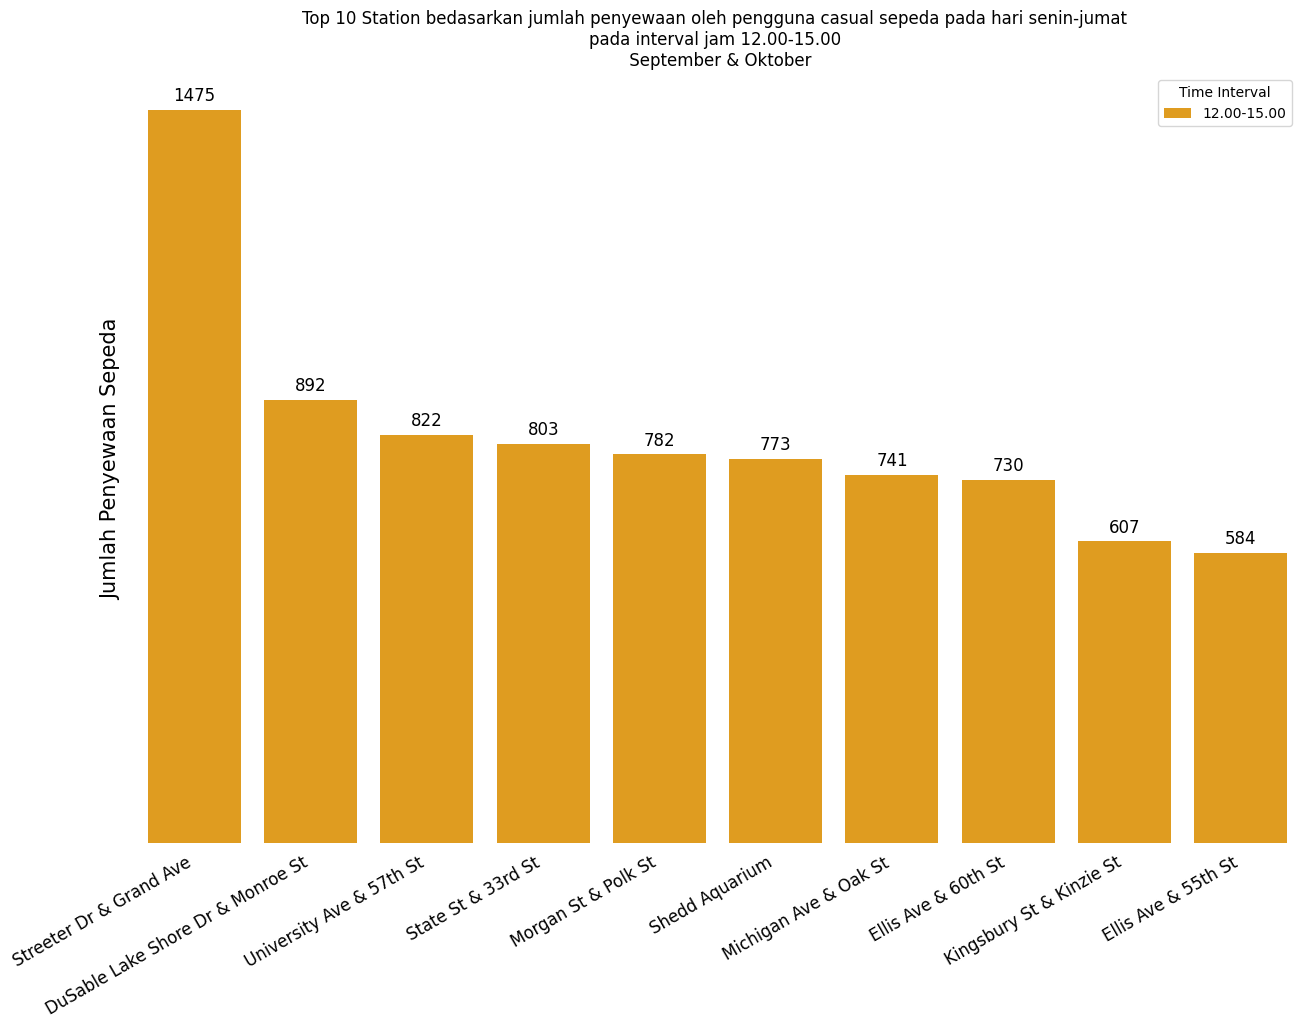

In [49]:
df_sep_okt=df_q3.loc[df_q3['month'].isin([9,10])]
week_day=df_sep_okt.loc[(df_sep_okt['start_day'].isin(['Monday','Tuesday','Wednesday','Thurdsay','Friday']))]
stations_ti=week_day.loc[week_day['time_interval']=='12.00-15.00']
top10_station = stations_ti.groupby(['start_station_id'])['ride_id'].count().sort_values(ascending=False).head(10).index
station_ti= stations_ti.loc[(stations_ti['start_station_id'].isin(top10_station))]
top5_station_ti=station_ti.groupby(['start_station_name','time_interval'])['ride_id'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,10))
ax= sns.barplot(data=top5_station_ti,x='start_station_name',y='ride_id', color='orange',  label='12.00-15.00')
plt.legend(title='Time Interval')
plt.title(f'Top 10 Station bedasarkan jumlah penyewaan oleh pengguna casual sepeda pada hari senin-jumat \npada interval jam 12.00-15.00 \n September & Oktober')
plt.xlabel('nama station')
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(yticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
# ax.set(ylabel=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h!=0:
        ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), fontsize=12, textcoords="offset points", ha="center", va="bottom")

plt.show()

C:\Users\firda\AppData\Local\Temp\ipykernel_7316\810392079.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


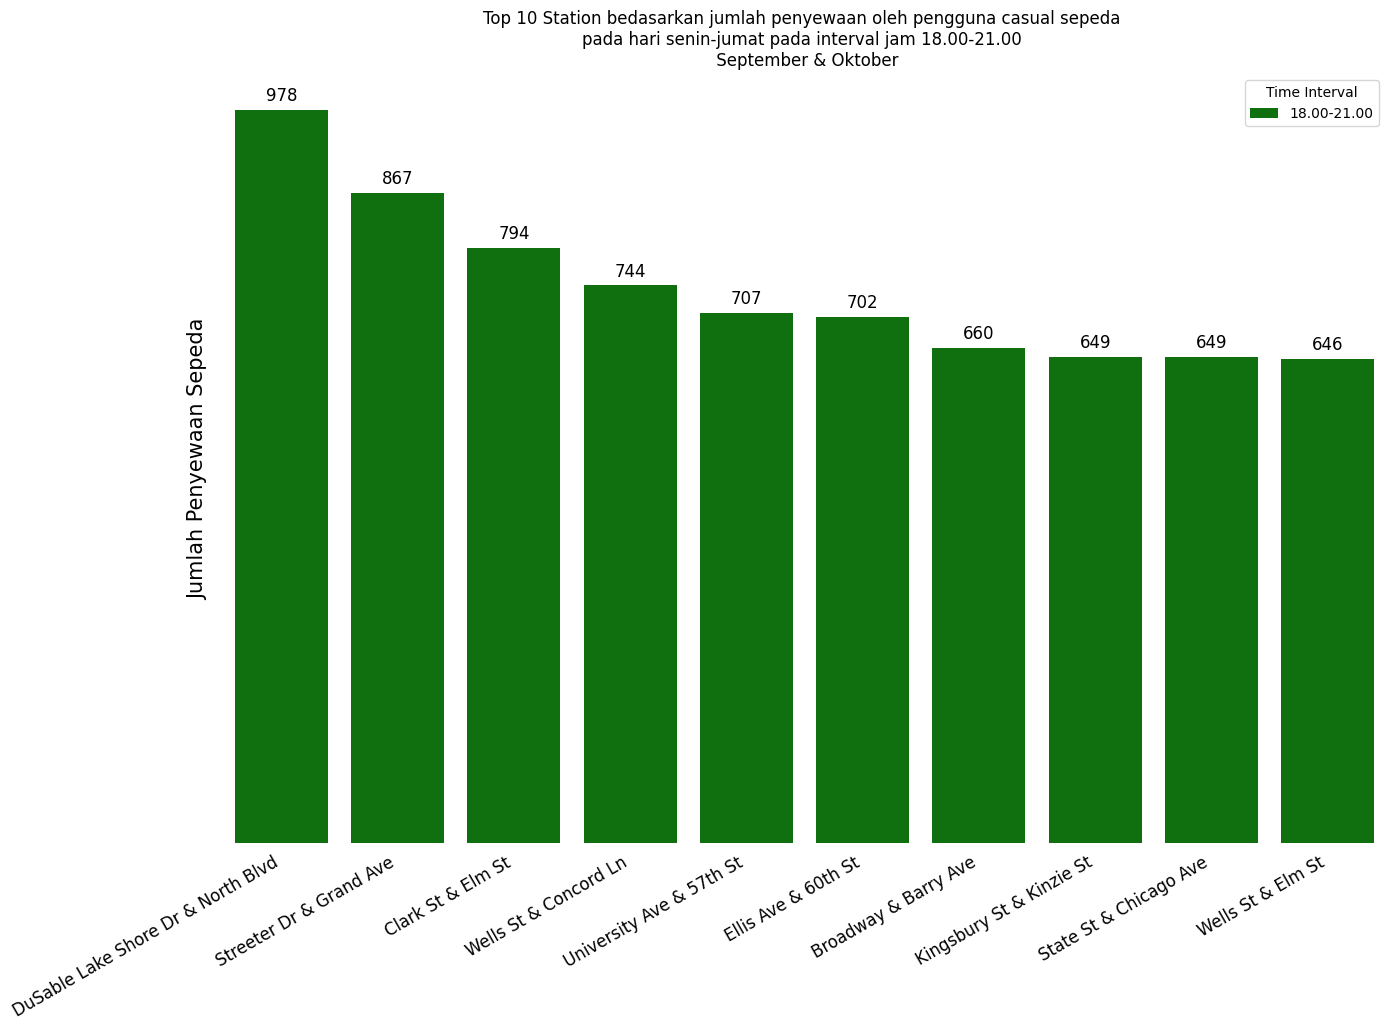

In [50]:
df_sep_okt=df_q3.loc[df_q3['month'].isin([9,10])]
week_day=df_sep_okt.loc[(df_sep_okt['start_day'].isin(['Monday','Tuesday','Wednesday','Thurdsay','Friday']))]
stations_ti=week_day.loc[(week_day['time_interval']=='18.00-21.00')]
top10_station = stations_ti.groupby(['start_station_id'])['ride_id'].count().sort_values(ascending=False).head(10).index
station_ti= stations_ti.loc[(stations_ti['start_station_id'].isin(top10_station))]
top5_station_ti=station_ti.groupby(['start_station_name','time_interval'])['ride_id'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,10))
ax= sns.barplot(data=top5_station_ti,x='start_station_name',y='ride_id',color='green', label='18.00-21.00')
plt.title(f'Top 10 Station bedasarkan jumlah penyewaan oleh pengguna casual sepeda \npada hari senin-jumat pada interval jam 18.00-21.00 \n September & Oktober')
plt.xlabel('nama station')
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Time Interval')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(yticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
# ax.set(ylabel=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h!=0:
        ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), fontsize=12, textcoords="offset points", ha="center", va="bottom")

plt.show()

In [51]:
df_q3['time_interval'].unique()

array(['00.00-03.00', '09.00-12.00', '18.00-21.00', '15.00-18.00',
       '12.00-15.00', '21.00-24.00', '06.00-09.00', '03.00-06.00'],
      dtype=object)

In [52]:
week_day=df_q3.loc[(df_q3['start_day']=='Monday')|(df_q3['start_day']=='Tuesday')|(df_q3['start_day']=='Wednesday')|(df_q3['start_day']=='Thursday')|(df_q3['start_day']=='Friday')]
stations_ti=week_day.loc[week_day['time_interval']=='09.00-12.00']
stations_ti

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,distance_km,ride_duration,time_interval,start_day,end_day,month,week,Weekday/Weekday,duration_minutes
16,A13DECC07C318A6F,classic_bike,2023-09-14 10:37:54,2023-09-14 10:40:16,Clark St & Drummond Pl,TA1307000142,Clark St & Wellington Ave,TA1307000136,41.931248,-87.644336,...,member,0.640954,2.37,09.00-12.00,Thursday,Thursday,9,2,Weekday,2.366667
50,10DACF64475D292F,classic_bike,2023-09-04 09:46:32,2023-09-04 10:29:02,Clybourn Ave & Division St,TA1307000115,Burnham Harbor,15545,41.904613,-87.640552,...,member,5.696960,42.50,09.00-12.00,Monday,Monday,9,1,Weekday,42.500000
59,2E70FC7B2E82EDB5,classic_bike,2023-09-04 11:48:09,2023-09-04 11:54:46,Sheridan Rd & Argyle St,13059,Clarendon Ave & Gordon Ter,13379,41.973287,-87.654760,...,member,1.768837,6.62,09.00-12.00,Monday,Monday,9,1,Weekday,6.616667
91,A1F7254D9360CD3D,classic_bike,2023-09-06 09:08:22,2023-09-06 09:17:42,Desplaines St & Kinzie St,TA1306000003,Larrabee St & Kingsbury St,TA1306000009,41.888716,-87.644448,...,member,1.014381,9.33,09.00-12.00,Wednesday,Wednesday,9,1,Weekday,9.333333
114,0476C2445A9FF111,classic_bike,2023-09-29 09:13:40,2023-09-29 09:15:42,Leavitt St & North Ave,TA1308000005,Damen Ave & Pierce Ave,TA1305000041,41.910509,-87.682389,...,member,0.407927,2.03,09.00-12.00,Friday,Friday,9,5,Weekday,2.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224026,4F08ED05716D78FF,classic_bike,2023-12-12 10:33:09,2023-12-12 12:08:56,State St & Randolph St,TA1305000029,Morgan St & Lake St*,chargingstx4,41.884621,-87.627834,...,casual,2.026776,95.78,09.00-12.00,Tuesday,Tuesday,12,15,Weekday,95.783333
224027,B77556E1A095C4D6,classic_bike,2023-12-01 09:53:22,2023-12-01 09:56:20,Franklin St & Monroe St,TA1309000007,LaSalle St & Washington St,13006,41.880317,-87.635185,...,member,0.341204,2.97,09.00-12.00,Friday,Friday,12,14,Weekday,2.966667
224049,6D427553ADD4E80C,classic_bike,2023-12-29 11:09:37,2023-12-29 11:13:10,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,...,member,0.598173,3.55,09.00-12.00,Friday,Friday,12,18,Weekday,3.550000
224053,52FF3FC5635F9561,classic_bike,2023-12-07 11:39:41,2023-12-07 11:42:57,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,...,member,0.598173,3.27,09.00-12.00,Thursday,Thursday,12,14,Weekday,3.266667


C:\Users\firda\AppData\Local\Temp\ipykernel_7316\2131822708.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


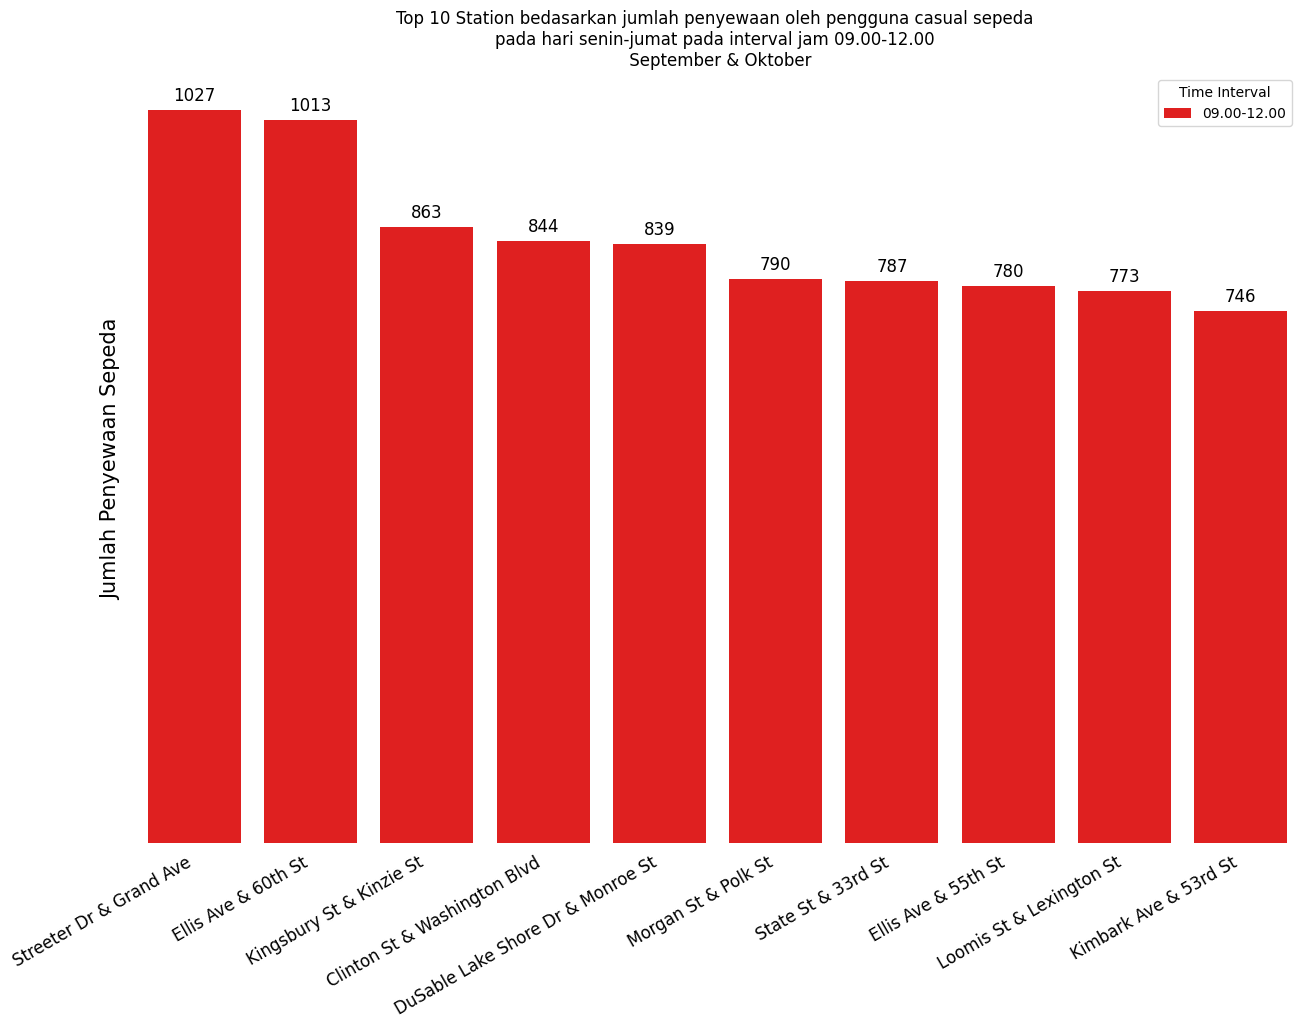

In [53]:
week_day=df_q3.loc[(df_q3['start_day']=='Monday')|(df_q3['start_day']=='Tuesday')|(df_q3['start_day']=='Wednesday')|(df_q3['start_day']=='Thursday')|(df_q3['start_day']=='Friday')]
stations_ti=week_day.loc[week_day['time_interval']=='09.00-12.00']
top10_station = stations_ti.groupby(['start_station_id'])['ride_id'].count().sort_values(ascending=False).head(10).index
station_ti= stations_ti.loc[(stations_ti['start_station_id'].isin(top10_station))]
top5_station_ti=station_ti.groupby(['start_station_name','time_interval'])['ride_id'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,10))
ax= sns.barplot(data=top5_station_ti,x='start_station_name',y='ride_id',color='red', label='09.00-12.00')
plt.title(f'Top 10 Station bedasarkan jumlah penyewaan oleh pengguna casual sepeda \npada hari senin-jumat pada interval jam 09.00-12.00 \n September & Oktober')
plt.xlabel('nama station')
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Time Interval')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(yticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
# ax.set(ylabel=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h!=0:
        ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), fontsize = 12, textcoords="offset points", ha="center", va="bottom")

plt.show()

C:\Users\firda\AppData\Local\Temp\ipykernel_7316\1126515414.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


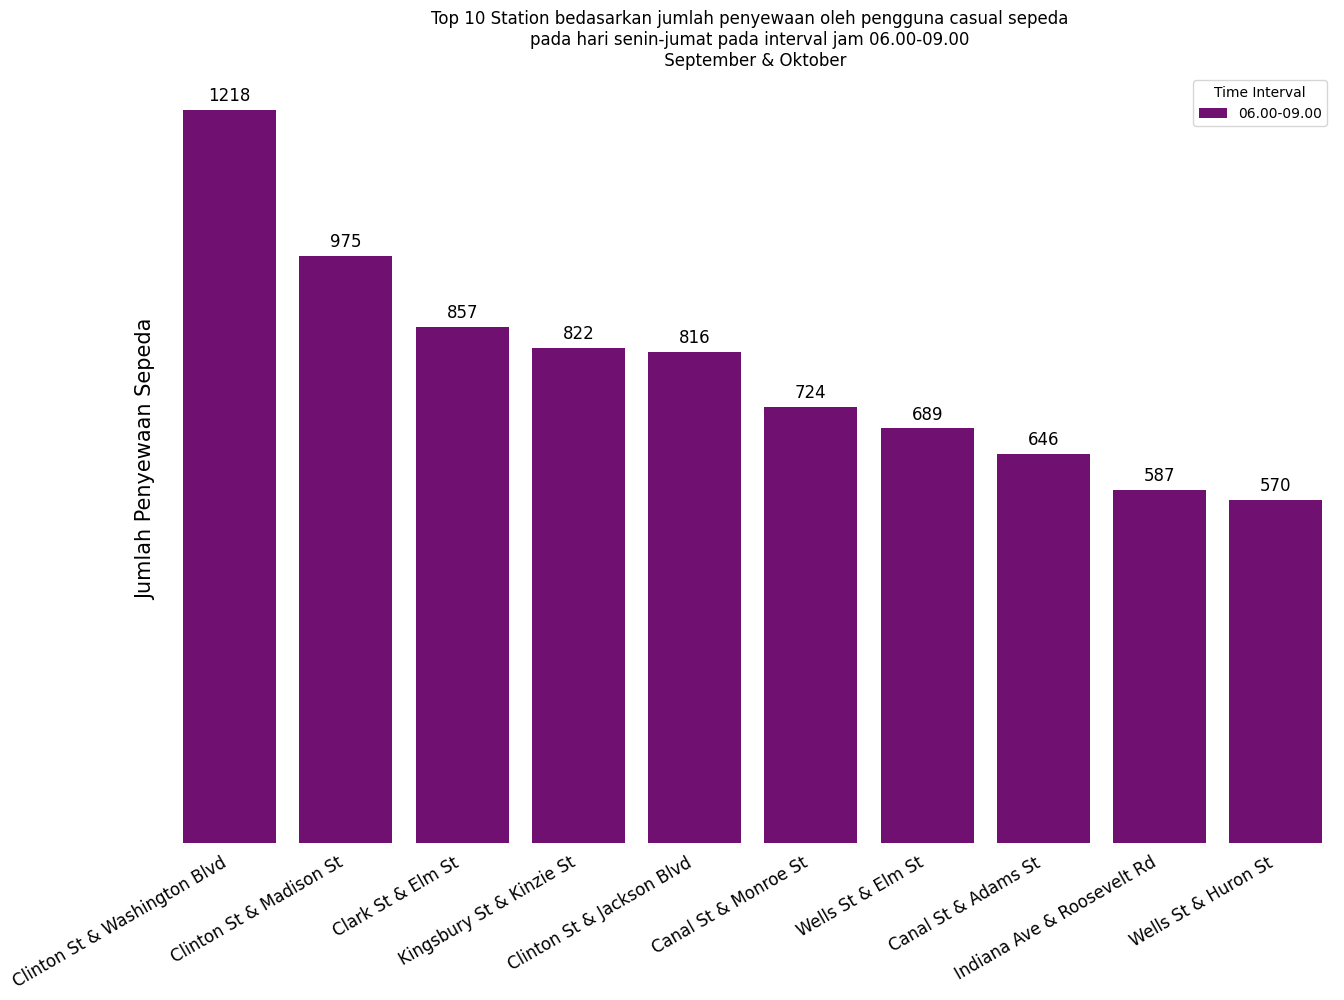

In [54]:
df_sep_okt=df_q3.loc[df_q3['month'].isin([9,10])]
week_day=df_sep_okt.loc[(df_sep_okt['start_day'].isin(['Monday','Tuesday','Wednesday','Thurdsay','Friday']))]
stations_ti=week_day.loc[week_day['time_interval']=='06.00-09.00']
top10_station = stations_ti.groupby(['start_station_id'])['ride_id'].count().sort_values(ascending=False).head(10).index
station_ti= stations_ti.loc[(stations_ti['start_station_id'].isin(top10_station))]
top5_station_ti=station_ti.groupby(['start_station_name','time_interval'])['ride_id'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,10))
ax= sns.barplot(data=top5_station_ti,x='start_station_name',y='ride_id',color='purple', label='06.00-09.00')
plt.title(f'Top 10 Station bedasarkan jumlah penyewaan oleh pengguna casual sepeda \npada hari senin-jumat pada interval jam 06.00-09.00 \n September & Oktober')
plt.xlabel('nama station')
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Time Interval')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(yticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
# ax.set(ylabel=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h!=0:
        ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), fontsize=12, textcoords="offset points", ha="center", va="bottom")

plt.show()

C:\Users\firda\AppData\Local\Temp\ipykernel_7316\2511057555.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


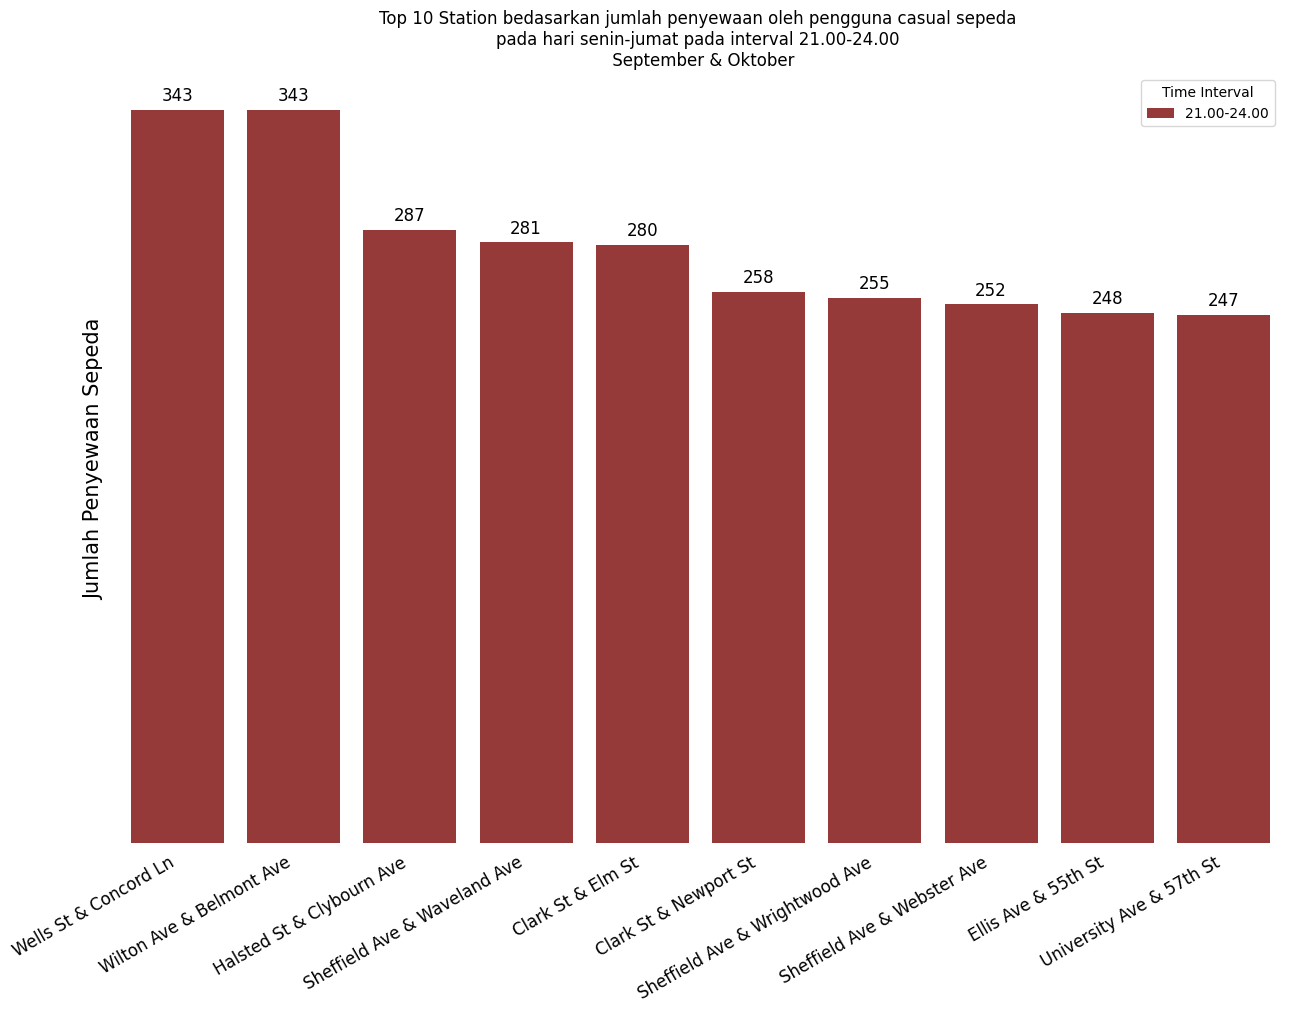

In [55]:
df_sep_okt=df_q3.loc[df_q3['month'].isin([9,10])]
week_day=df_sep_okt.loc[(df_sep_okt['start_day'].isin(['Monday','Tuesday','Wednesday','Thurdsay','Friday']))]
stations_ti=week_day.loc[week_day['time_interval']=='21.00-24.00']
top10_station = stations_ti.groupby(['start_station_id'])['ride_id'].count().sort_values(ascending=False).head(10).index
station_ti= stations_ti.loc[(stations_ti['start_station_id'].isin(top10_station))]
top5_station_ti=station_ti.groupby(['start_station_name','time_interval'])['ride_id'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,10))
ax= sns.barplot(data=top5_station_ti,x='start_station_name',y='ride_id',color='brown', label='21.00-24.00')
plt.title(f'Top 10 Station bedasarkan jumlah penyewaan oleh pengguna casual sepeda \npada hari senin-jumat pada interval 21.00-24.00 \n September & Oktober')
plt.xlabel('nama station')
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Time Interval')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(yticklabels=[])
ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.set(xlabel=None)
# ax.set(ylabel=None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h!=0:
        ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), fontsize= 12, textcoords="offset points", ha="center", va="bottom")

plt.show()

## Analisis bedasarkan tipe sepeda

In [56]:
# Extract month from 'started_at' column
df_q3['month'] = df_q3['started_at'].dt.month

# Group by month and member type, then count the number of rides
rides_by_month_member_type = df_q3.groupby(['month', 'member_casual']).size().unstack(fill_value=0)

# Calculate the difference between casual and member rides for each month
rides_by_month_member_type['difference'] =  rides_by_month_member_type['member'] - rides_by_month_member_type['casual']

# Print the result
print("Difference between casual and member rides for each month:")
print(rides_by_month_member_type['difference'])

Difference between casual and member rides for each month:
month
9     110003
10    139672
11    127028
12     90815
Name: difference, dtype: int64


C:\Users\firda\AppData\Local\Temp\ipykernel_7316\240901965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['month'] = df_q3['started_at'].dt.month


In [57]:
# Group by bike type and member type, then count the number of rides
rides_by_bike_type_member_type = df_q3.groupby(['rideable_type', 'member_casual']).size().unstack(fill_value=0)

# Calculate the difference between casual and member rides for each bike type
rides_by_bike_type_member_type['difference'] = rides_by_bike_type_member_type['member'] - rides_by_bike_type_member_type['casual']

# Print the result
print("Difference between casual and member rides for each bike type:")
print(rides_by_bike_type_member_type['difference'])

Difference between casual and member rides for each bike type:
rideable_type
classic_bike     330348
electric_bike    137170
Name: difference, dtype: int64


Text(0.5, 0, 'Jumlah Casual Ride')

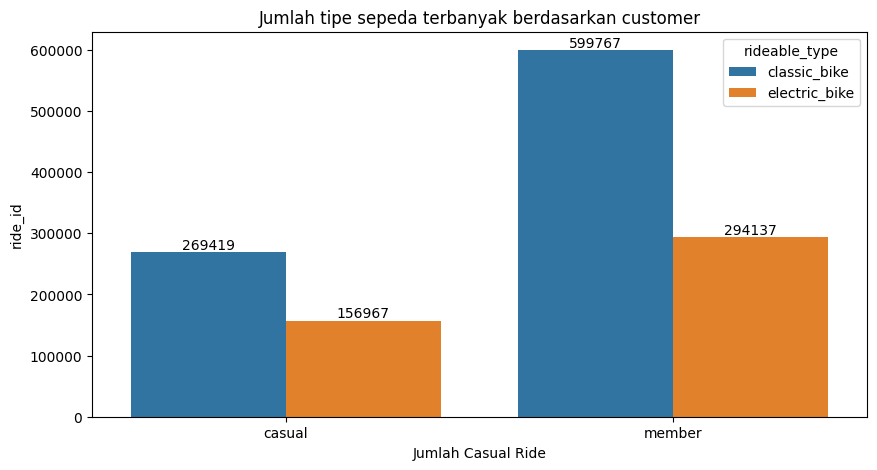

In [58]:
df_weekly_casual_week_ride = df_q3.groupby(['member_casual', 'rideable_type'])[['ride_id']].nunique()
plt.figure(figsize=(10,5))
ax = sns.barplot(df_weekly_casual_week_ride, x='member_casual', y='ride_id', hue='rideable_type')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Jumlah tipe sepeda terbanyak berdasarkan customer")
plt.xlabel("Jumlah Casual Ride")

Text(0.5, 0, 'Jumlah Casual Ride')

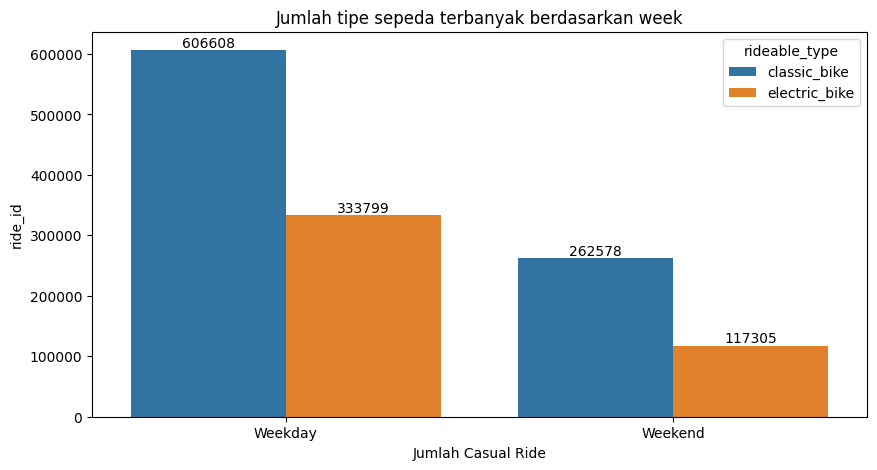

In [59]:
df_weekly_casual_week_ride = df_q3.groupby(['Weekday/Weekday', 'rideable_type'])[['ride_id']].nunique()
df_weekly_casual_week
plt.figure(figsize=(10,5))
ax = sns.barplot(df_weekly_casual_week_ride, x='Weekday/Weekday', y='ride_id', hue='rideable_type')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Jumlah tipe sepeda terbanyak berdasarkan week")
plt.xlabel("Jumlah Casual Ride")

Text(0.5, 0, 'Jumlah Casual Ride')

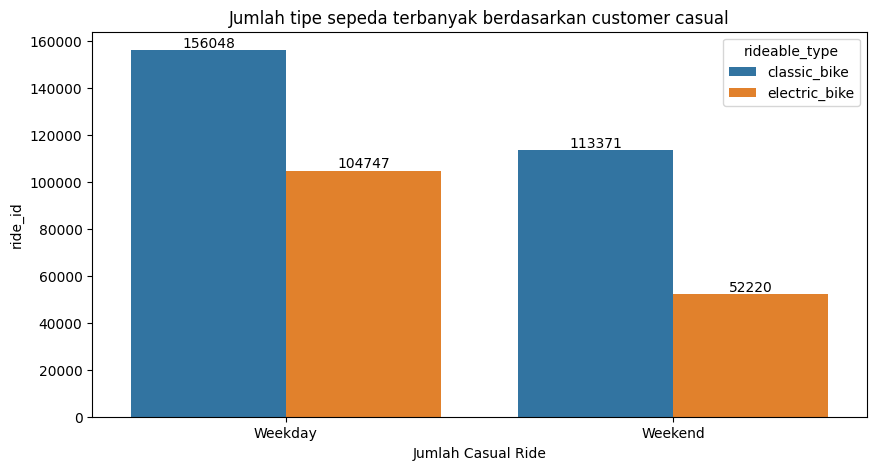

In [60]:
df_weekly_casual_week_ride = df_q3.loc[df_q3['member_casual'] == 'casual'].groupby(['Weekday/Weekday', 'rideable_type'])[['ride_id']].nunique()
df_weekly_casual_week
plt.figure(figsize=(10,5))
ax = sns.barplot(df_weekly_casual_week_ride, x='Weekday/Weekday', y='ride_id', hue='rideable_type')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Jumlah tipe sepeda terbanyak berdasarkan customer casual")
plt.xlabel("Jumlah Casual Ride")

# Kesimpulan


# Rekomendasi